**<font size="6">Talking Data User Demographics ML Case study </font>**

**<font size="5">Business Problem </font>**

Nothing is more comforting than being greeted by your favorite drink just as you walk through the door of the corner cafe. While a thoughtful barista knows you take a macchiato every Wednesday morning at 8:15, it’s much more difficult in a digital space for your preferred brands to personalize your experience.

TalkingData, China’s largest third-party mobile data platform, understands that everyday choices and behaviors paint a picture of who we are and what we value. Currently, TalkingData is seeking to leverage behavioral data from more than 70% of the 500 million mobile devices active daily in China to help its clients better understand and interact with their audiences.

In this competition, Kagglers are challenged to build a model predicting users demographic characteristics based on their app usage, geolocation, and mobile device properties.

**<font size="5">Problem Statement</font>**

Classify people in different groups based on data like their phone brands, device models,apps used.So will help brand advertisers to make marketing efforts which are relevant to their users and catered to their preferences.


**<font size="5">Data Overview</font>**

Data: The Data is collected from TalkingData SDK integrated within mobile apps TalkingData serves under the service term between TalkingData and mobile app developers.

Source: https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data

1.**gender_age_train.csv, gender_age_test.csv** - the training and test set
group: this is the target variable you are going to predict.

2.**events.csv, app_events.csv** - when a user uses TalkingData SDK, the event gets logged in this data. Each event has an event id, location (lat/long), and the event corresponds to a list of apps in app_events.
timestamp: when the user is using an app with TalkingData SDK

3.**app_labels.csv bold**- apps and their labels, the label_id's can be used to join with label_categories

4.**label_categories.csv**- apps' labels and their categories in text

5.**phone_brand_device_model.csv** - device ids, brand, and models
phone_brand: note that the brands are in Chinese (translation courtesy of user fromandto). 

三星 samsung

天语 Ktouch

海信 hisense

联想 lenovo

欧比 obi

爱派尔 ipair

努比亚 nubia

优米 youmi

朵唯 dowe

黑米 heymi

锤子 hammer

酷比魔方 koobee

美图 meitu

尼比鲁 nibilu

一加 oneplus

优购 yougo

诺基亚 nokia

糖葫芦 candy

中国移动 ccmc

语信 yuxin

基伍 kiwu

青橙 greeno

华硕 asus

夏新 panosonic

维图 weitu

艾优尼 aiyouni

摩托罗拉 moto

乡米 xiangmi

米奇 micky

大可乐 bigcola

沃普丰 wpf

神舟 hasse

摩乐 mole

飞秒 fs

米歌 mige

富可视 fks

德赛 desci

梦米 mengmi

乐视 lshi

小杨树 smallt

纽曼 newman

邦华 banghua

E派 epai

易派 epai

普耐尔 pner

欧新 ouxin

西米 ximi

海尔 haier

波导 bodao

糯米 nuomi

唯米 weimi

酷珀 kupo

谷歌 google

昂达 ada

聆韵 lingyun

 

**<font size="3">Real world/Business objectives and constraints</font>**

*   No Latency requirement
*   probability of point belonging to each classs is needed

**<font size="5">Machine learning problem formulation</font>**



**<font size="3">Type of Machine learning problem</font>**

There are 12 different classes groups can be classified into => Multiclass classification problem.

**<font size="3">Performance Metric</font>**



*   Multi-class log loss
*   Confusion metrics

**<font size='3'>Machine learning objectives and constraints </font>**

**objectives**: Predicting the probability of each data point belonging to 12 classes.

**constraints**: 

*   No latency requirement
*   Class probabilities are needed




#**Exploratory Data Analysis**

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/TalkingData Mobile User Demographics'

In [ ]:
%cd '/content/drive/MyDrive/TalkingData Mobile User Demographics'

/content/drive/MyDrive/TalkingData Mobile User Demographics


In [ ]:
# ! kaggle competitions download -c talkingdata-mobile-user-demographics

In [ ]:
# !unzip \*.zip && rm*.zipnn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gender_age_train =  pd.read_csv('gender_age_train.csv')

In [ ]:
gender_age_train.head()

device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31

In [ ]:
gender_age_train.shape

(74645, 4)

In [ ]:
gender_age_train['group'].value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

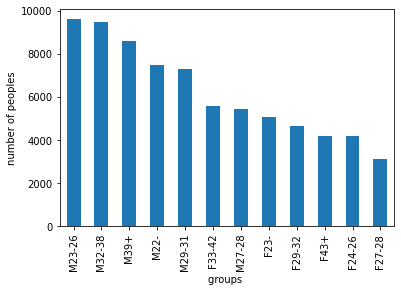

In [ ]:
plt.xlabel('groups ')
plt.ylabel('number of peoples')
gender_age_train['group'].value_counts().plot.bar()

**Observation**

1.It can be seen that data is imbalance.

2.Groups with male with age group 23-26 and 32-38 have large number of peoples and groups with female with age group 24-26,27-28 and 43+ have less number of peoples

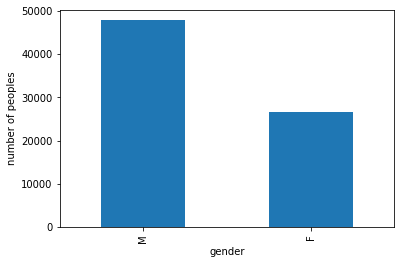

In [ ]:
plt.xlabel('gender')
plt.ylabel('number of peoples')
gender_age_train['gender'].value_counts().plot.bar()

**Observation**

1.Since the data is imbalance, the number of males is greater than number of females

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


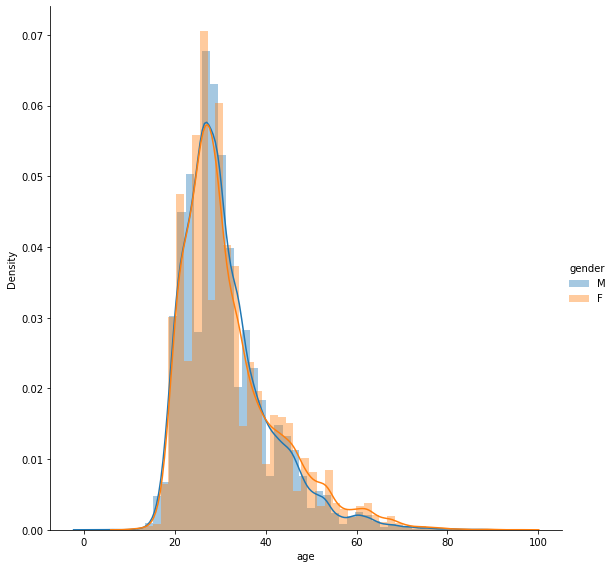

In [ ]:
sns.FacetGrid(data=gender_age_train,hue='gender',height=8).map(sns.distplot,'age').add_legend()

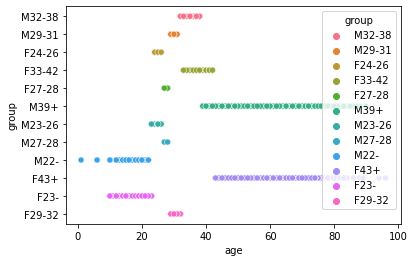

In [ ]:
sns.scatterplot(x=gender_age_train['age'],y = gender_age_train['group'], hue = gender_age_train['group'])

In [ ]:
# https://www.youtube.com/watch?v=I_kUj-MfYys - crosstab explanation
# crosstab() function takes two or more lists, pandas series or dataframe columns and returns a frequency of each combination by default.
# to generate total we use 'margins=True'
pd.crosstab([gender_age_train.gender,gender_age_train.group],gender_age_train.age,margins=True).style.background_gradient(cmap='summer_r')

**Observation**

1.There are more number of females within age groups F21-23,F24-26,F27-28,F29-32

2.There are more number of males within age  groups M23-26,M27-28,M29-31,M32-38

In [ ]:
gender_age_train.shape

(74645, 4)

In [ ]:
a= gender_age_train['device_id'].unique()
print(len(a))

74645


**Observation**

1.There are no duplicates in training data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


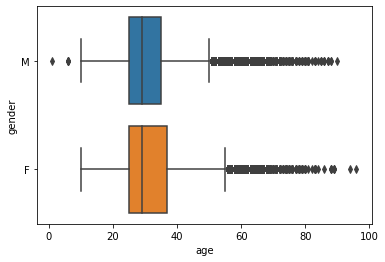

In [ ]:
sns.boxplot(gender_age_train['age'],gender_age_train['gender'])

**Observation**

1.Mean and Median of both age values is similar

2.25,50 and 75 percentile age values of both are similar

**Gender age test data**

In [ ]:


gender_age_test =  pd.read_csv('gender_age_test.csv')
gender_age_test.head()

device_id
0  1002079943728939269
1 -1547860181818787117
2  7374582448058474277
3 -6220210354783429585
4 -5893464122623104785

In [ ]:
uni_len = gender_age_test['device_id'].unique()
print(f'Number of values in test data {gender_age_test.shape[0]}')
print(f'Number of unique values in test data {len(uni_len)} ')

Number of values in test data 112071
Number of unique values in test data 112071 


**Observation**

The number of unique device ID's in test data is 112071. 

 **Phone Brand and Device Model**

In [ ]:
phone_data = pd.read_csv('phone_brand_device_model.csv')
phone_data.head()

device_id phone_brand   device_model
0 -8890648629457979026          小米             红米
1  1277779817574759137          小米           MI 2
2  5137427614288105724          三星      Galaxy S4
3  3669464369358936369       SUGAR           时尚手机
4 -5019277647504317457          三星  Galaxy Note 2

In [ ]:
uni_device_id = phone_data['device_id'].unique()

print(f' Number of device IDs {phone_data.shape[0]} ')
print(f' Number of unique device IDs {len(uni_device_id)} ')
print(f' There are {abs(len(uni_device_id) - phone_data.shape[0])} duplicate IDs')

 Number of device IDs 187245 
 Number of unique device IDs 186716 
 There are 529 duplicate IDs


In [ ]:
english_phone_brands_mapping = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX"
}

phone_data['phone_brand'] = phone_data['phone_brand'].map(english_phone_brands_mapping)

In [ ]:
phone_data.head()

device_id phone_brand   device_model
0 -8890648629457979026      Xiaomi             红米
1  1277779817574759137      Xiaomi           MI 2
2  5137427614288105724     samsung      Galaxy S4
3  3669464369358936369       SUGAR           时尚手机
4 -5019277647504317457     samsung  Galaxy Note 2

In [ ]:
print(phone_data.shape)
no_unique_brands= phone_data['phone_brand'].unique()
print(f'Number of unique phone brands {len(no_unique_brands)}')

(187245, 3)
Number of unique phone brands 97


Text(0, 0.5, 'brands')

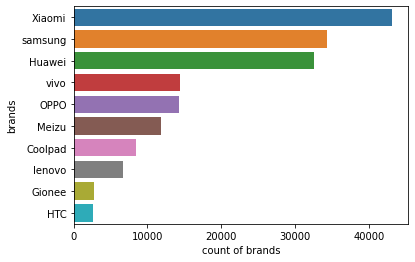

In [ ]:
brand_counts = phone_data['phone_brand'].value_counts().reset_index().head(10)
# brand_counts_sorted = sorted(brand_counts.items(), key = lambda d: d[1], reverse=True )
sns.barplot(x=brand_counts['phone_brand'],y=brand_counts['index'])
plt.xlabel('count of brands')
plt.ylabel('brands')

In [ ]:
brand_values = phone_data["phone_brand"].value_counts().reset_index()
top_cnt = 0
total_cnt = 0
for i in range(10):
    top_cnt += brand_values['phone_brand'][i]
for i in range(len(brand_values)):
    total_cnt += brand_values['phone_brand'][i]
    
print("Counts of top 10 brands =",top_cnt)
print("Counts of all brands =",total_cnt)
print("Percentage of devices top brands account for =",(top_cnt/total_cnt)*100,"%")
print("-"*50)

print('The pecentage for top 10 brands are as follows')
for i in range(10):
    print(str(brand_values['index'][i])+" accounts for "+str((brand_values['phone_brand'][i]/total_cnt)*100)+" % of the total devices.")

Counts of top 10 brands = 171215
Counts of all brands = 187132
Percentage of devices top brands account for = 91.49423936045145 %
--------------------------------------------------
The pecentage for top 10 brands are as follows
Xiaomi accounts for 23.09065258747836 % of the total devices.
samsung accounts for 18.32182630442682 % of the total devices.
Huawei accounts for 17.4016202466708 % of the total devices.
vivo accounts for 7.692431011264776 % of the total devices.
OPPO accounts for 7.635786503644486 % of the total devices.
Meizu accounts for 6.334031592672552 % of the total devices.
Coolpad accounts for 4.492550712865785 % of the total devices.
lenovo accounts for 3.6129576983092146 % of the total devices.
Gionee accounts for 1.4791697838958597 % of the total devices.
HTC accounts for 1.4332129192227947 % of the total devices.


**Observation**

1.Xiaomi,Samsung,Huawei,Vivo are the top 4 brands which are most used by peoples

2.The Top 10 brands covers 91% of all devices

3.There are total 97 unique phone brands

In [ ]:
print(phone_data.shape)
no_unique_devicemodels= phone_data['device_model'].unique()
print(f'Number of unique device models {len(no_unique_devicemodels)}')

(187245, 3)
Number of unique device models 1599


Text(0, 0.5, 'Device models')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29609 missing from current font.
  font.set_

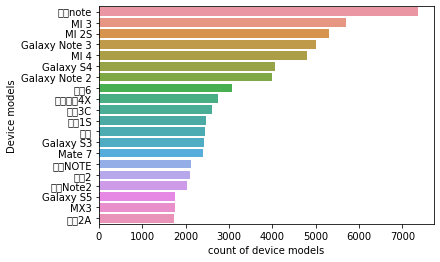

In [ ]:
devicemodel_counts = phone_data['device_model'].value_counts().reset_index().head(20)
sns.barplot(x=devicemodel_counts['device_model'],y=devicemodel_counts['index'])
plt.xlabel('count of device models')
plt.ylabel('Device models')

In [ ]:
devicemodel_counts = phone_data["device_model"].value_counts().reset_index()
top_cnt = 0
total_cnt = 0
for i in range(20):
    top_cnt += devicemodel_counts['device_model'][i]
for i in range(len(devicemodel_counts)):
    total_cnt += devicemodel_counts['device_model'][i]
    
print("Counts of top 10 device models =",top_cnt)
print("Counts of all models =",total_cnt)
print("Percentage of devices top 10 models account for =",(top_cnt/total_cnt)*100,"%")
print("-"*50)

print('The pecentage for top 10 models are as follows')
for i in range(20):
    print(str(devicemodel_counts['index'][i])+" accounts for "+str((devicemodel_counts['device_model'][i]/total_cnt)*100)+" % of the total devices.")

Counts of top 10 device models = 65922
Counts of all models = 187245
Percentage of devices top 10 models account for = 35.206280541536486 %
--------------------------------------------------
The pecentage for top 10 models are as follows
红米note accounts for 3.9296109375417236 % of the total devices.
MI 3 accounts for 3.050548746294961 % of the total devices.
MI 2S accounts for 2.8347886458917464 % of the total devices.
Galaxy Note 3 accounts for 2.6804454057518226 % of the total devices.
MI 4 accounts for 2.5624182221154106 % of the total devices.
Galaxy S4 accounts for 2.167748137466955 % of the total devices.
Galaxy Note 2 accounts for 2.1325002002723705 % of the total devices.
荣耀6 accounts for 1.6427674971294295 % of the total devices.
荣耀畅玩4X accounts for 1.4708002883922136 % of the total devices.
荣耀3C accounts for 1.3874869822959224 % of the total devices.
红米1S accounts for 1.3239338834147776 % of the total devices.
红米 accounts for 1.3020374375817778 % of the total devices.
Galaxy 

**Observation**

1.Top 5 device models used by majority of peoples are 红米note,MI 3,MI 2S,GalaxyNote 3,MI 4.

2.Top 20 device models covers 35% of all device models.

3.There are 1599 unique device models.


In [ ]:
print(gender_age_train.shape)
print(phone_data.shape)
print(gender_age_train.isnull().sum())

(74645, 4)
(187245, 3)
device_id    0
gender       0
age          0
group        0
dtype: int64


In [ ]:

# we are not merging train data with phone data because we will get more null values, so we will merge phone data with train data so that we can get less null values

merge_phonedata_train = gender_age_train.merge(phone_data,on='device_id',how='left')
merge_phonedata_train.head()

device_id gender  age   group phone_brand device_model
0 -8076087639492063270      M   35  M32-38      Xiaomi         MI 2
1 -2897161552818060146      M   35  M32-38      Xiaomi         MI 2
2 -8260683887967679142      M   35  M32-38      Xiaomi         MI 2
3 -4938849341048082022      M   30  M29-31      Xiaomi       红米note
4   245133531816851882      M   30  M29-31      Xiaomi         MI 3

In [ ]:
# we are getting less null values beacuse we have merged phone data with train data
merge_phonedata_train.isnull().sum()

device_id        0
gender           0
age              0
group            0
phone_brand     40
device_model     0
dtype: int64

Finding relation between age,gender on phone brand and device model

In [ ]:
merge_phonedata_train.head()

device_id gender  age   group phone_brand device_model
0 -8076087639492063270      M   35  M32-38      Xiaomi         MI 2
1 -2897161552818060146      M   35  M32-38      Xiaomi         MI 2
2 -8260683887967679142      M   35  M32-38      Xiaomi         MI 2
3 -4938849341048082022      M   30  M29-31      Xiaomi       红米note
4   245133531816851882      M   30  M29-31      Xiaomi         MI 3

In [ ]:
# The following code creates new dataframe (new_df), which will have  device_id,age,gender,group,device_model only for top 10 brands which are present in brands_list list

# column_names = ['device_id','gender','age','group','phone_brand','device_model']
# new_df = pd.DataFrame(columns=column_names)
# # print(new_df)
# brands_list=['Xiaomi','samsung','Huawei','vivo','OPPO','Meizu','Coolpad','lenovo','Gionee','HTC']
# for index,rows in merge_phonedata_train.iterrows():
#   if rows['phone_brand'] in brands_list:
#     new_df = new_df.append(pd.DataFrame([[rows[0],rows[1],rows[2],rows[3],rows[4],rows[5] ]], columns = ['device_id','gender','age','group','phone_brand','device_model' ]))

In [ ]:
# new_df.head()
# new_df.to_csv('newsorteddata.csv',index=False)

In [ ]:
newsorted = pd.read_csv('newsorteddata.csv')
newsorted.head()

device_id gender  age   group phone_brand device_model
0 -8076087639492063270      M   35  M32-38      Xiaomi         MI 2
1 -2897161552818060146      M   35  M32-38      Xiaomi         MI 2
2 -8260683887967679142      M   35  M32-38      Xiaomi         MI 2
3 -4938849341048082022      M   30  M29-31      Xiaomi       红米note
4   245133531816851882      M   30  M29-31      Xiaomi         MI 3

In [ ]:
#no null values are present
newsorted.isnull().sum()

device_id       0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

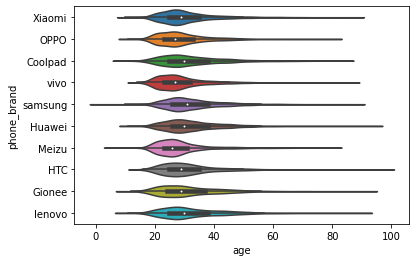

In [ ]:
sns.violinplot(x='age',y='phone_brand' , data=merge_phonedata_train.loc[merge_phonedata_train["phone_brand"].isin(list(brand_counts["index"]))]) 

In [ ]:
pd.crosstab([   newsorted['gender']],  newsorted['phone_brand'],margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab([   newsorted['age']],  newsorted['phone_brand'],margins=True).style.background_gradient(cmap='summer_r')


**Observation**

1.It can be seen that majority of males and females used Huawei,Xiaomi,Samsung as phone brand.

2.It can be seen that peoples from age 25-46 are most likely to have Huawei,Xiaomi,samsung as there phone brands.

3.Also people from age 17-23 are most likely to have Meizu,Vivo as there phone brands.



**Now checking the relation between age,gender and device models.**

In [ ]:
pd.crosstab([   newsorted['gender']],  newsorted['device_model'],margins=True).style.background_gradient(cmap='summer_r')

(0.0, 70.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29609 missing from current font.
  font.set_

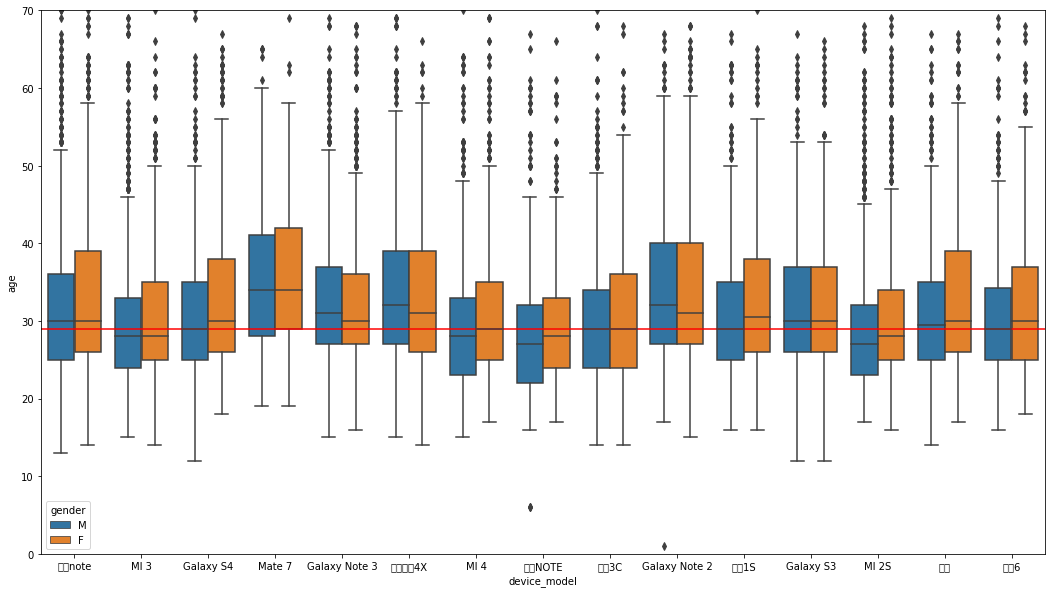

In [ ]:
# pd.crosstab([   newsorted['age']],  newsorted['device_model'],margins=True).style.background_gradient(cmap='summer_r')
device_values = phone_data["device_model"].value_counts().reset_index().head(15)
plt.figure(figsize=(18,10))
sns.boxplot(x ="device_model", y ="age", hue ="gender",
            data=merge_phonedata_train.loc[merge_phonedata_train["device_model"].isin(list(device_values["index"]))])
plt.axhline(merge_phonedata_train["age"].median(),color = "red")
plt.ylim(0,70)

**Observation**

1.It can be seen that majority of males and females used Galaxy S4, M12S, MI3, MI4.

2.It can be seen that people from age group 30-40 are most likely to have Mate 7,Galaxy Note 2 as there device models. 

3.Also from age group 23-28 are most likely to have Redmi NOTE, MI 2S as there device models.

**App labels and Label categories**


In [ ]:
label_categories = pd.read_csv('label_categories.csv')
app_labels = pd.read_csv('app_labels.csv')

In [ ]:

label_categories.head()

label_id           category
0         1                NaN
1         2     game-game type
2         3   game-Game themes
3         4     game-Art Style
4         5  game-Leisure time

In [ ]:

app_labels.head()

app_id  label_id
0  7324884708820027918       251
1 -4494216993218550286       251
2  6058196446775239644       406
3  6058196446775239644       407
4  8694625920731541625       406

In [ ]:

merge_labeldata = app_labels.merge(label_categories,on='label_id',how='left')
merge_labeldata['category'].value_counts()

Industry tag             56902
Custom label             53936
Tencent                  49320
game                     48707
Property Industry 2.0    45697
                         ...  
psychology                   1
Mother                       1
poker and chess              1
game-Gem Elimination         1
game-game type               1
Name: category, Length: 473, dtype: int64

In [ ]:
print(merge_labeldata.shape)
a = merge_labeldata['app_id'].unique()
b= merge_labeldata['label_id'].unique()
print(f'unique app ids {len(a)} and unique label ids {len(b)}')

(459943, 3)
unique app ids 113211 and unique label ids 507


In [ ]:

merge_labeldata.head()

app_id  label_id         category
0  7324884708820027918       251          Finance
1 -4494216993218550286       251          Finance
2  6058196446775239644       406          unknown
3  6058196446775239644       407  DS_P2P net loan
4  8694625920731541625       406          unknown

In [ ]:
# https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values
#Sorting dict by value in decending order and storing keys

cat_dict=dict(merge_labeldata['category'].value_counts())
cat_keys = [k for k in sorted(cat_dict, key=cat_dict.get, reverse=True)]
# #Taking Top 15 keys with highest values 
cat_top_keys=cat_keys[:15]
cat_top_values=[cat_dict.get(k) for k in cat_top_keys]
print(cat_top_keys)
print(cat_top_values)

['Industry tag', 'Custom label', 'Tencent', 'game', 'Property Industry 2.0', '1 free', 'Services 1', 'Property Industry new', 'Relatives 1', 'Irritation / Fun 1', 'Cards RPG', 'Casual puzzle categories', 'Personal Effectiveness 1', 'ARPG', 'Chess categories']
[56902, 53936, 49320, 48707, 45697, 19083, 11840, 9955, 9027, 8831, 7375, 7052, 5910, 5306, 5135]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


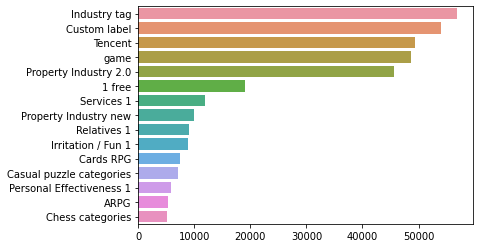

In [ ]:
sns.barplot(cat_top_values,cat_top_keys)

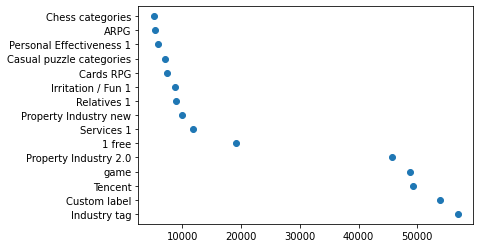

In [ ]:
plt.scatter(cat_top_values,cat_top_keys)

**Observation**

1.The Top app categories includes property industry 2.0,game,tencent,custom label,Industry tag

**Events Data**

In [ ]:
eventsdata = pd.read_csv('events.csv')
app_eventsdata = pd.read_csv('app_events.csv')

In [ ]:
print(eventsdata.shape)
print(eventsdata.head())

(3252950, 5)
   event_id            device_id            timestamp  longitude  latitude
0         1    29182687948017175  2016-05-01 00:55:25     121.38     31.24
1         2 -6401643145415154744  2016-05-01 00:54:12     103.65     30.97
2         3 -4833982096941402721  2016-05-01 00:08:05     106.60     29.70
3         4 -6815121365017318426  2016-05-01 00:06:40     104.27     23.28
4         5 -5373797595892518570  2016-05-01 00:07:18     115.88     28.66


In [ ]:
a = eventsdata['device_id'].unique()
b = eventsdata['event_id'].unique()
print(f' unique device id {len(a)} and unique event id {len(b)}')

 unique device id 60865 and unique event id 3252950


In [ ]:

print(app_eventsdata.shape)
print(app_eventsdata.head())

(32473067, 4)
   event_id               app_id  is_installed  is_active
0         2  5927333115845830913             1          1
1         2 -5720078949152207372             1          0
2         2 -1633887856876571208             1          0
3         2  -653184325010919369             1          1
4         2  8693964245073640147             1          1


In [ ]:
a = app_eventsdata['app_id'].unique()
b = app_eventsdata['event_id'].unique()
print(f' unique app id {len(a)} and unique event id {len(b)}')

 unique app id 19237 and unique event id 1488096


In [ ]:

app_eventsdata['is_installed'].value_counts()

1    32473067
Name: is_installed, dtype: int64

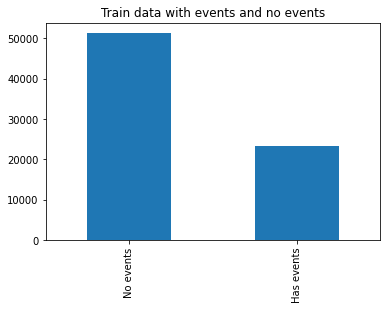

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html
devices_events=np.in1d(gender_age_train['device_id'].values,eventsdata['device_id'].values)
devices_eventscount = pd.Series(devices_events).map({True:'Has events',False:'No events'}).value_counts()
plt.title('Train data with events and no events')
devices_eventscount.plot.bar()


In [ ]:
print(f"Devices with events {(devices_eventscount['Has events']/(devices_eventscount['Has events'] + devices_eventscount['No events'])) * 100}")
print(f"Devices without events {(devices_eventscount['No events']/(devices_eventscount['Has events'] + devices_eventscount['No events'])) * 100}")

Devices with events 31.22647196731194
Devices without events 68.77352803268806


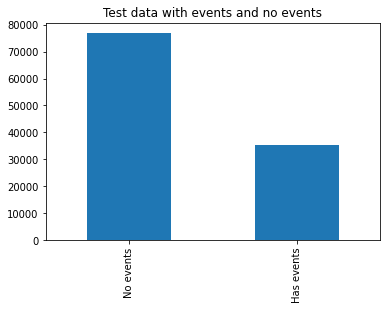

In [ ]:

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html
devices_events=np.in1d(gender_age_test['device_id'].values,eventsdata['device_id'].values)
devices_eventscount = pd.Series(devices_events).map({True:'Has events',False:'No events'}).value_counts()
plt.title('Test data with events and no events')
devices_eventscount.plot.bar()


In [ ]:
print(f"Devices with events {(devices_eventscount['Has events']/(devices_eventscount['Has events'] + devices_eventscount['No events'])) * 100}")
print(f"Devices without events {(devices_eventscount['No events']/(devices_eventscount['Has events'] + devices_eventscount['No events'])) * 100}")

Devices with events 31.403306832275966
Devices without events 68.59669316772403


**Observation**

1.In both train and test data we have almost 69% of device ids without events and 31% device ids with events.

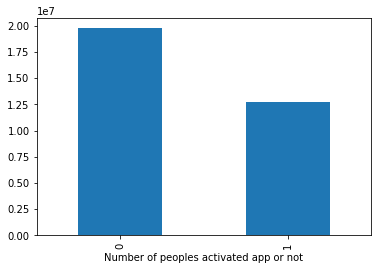

In [ ]:
plt.xlabel('Number of peoples activated app or not')
app_eventsdata['is_active'].value_counts().plot.bar()

**Observation**

1.Number of peoples not activated the app is over 60.78%.

2.Number of peoples activated the app is over 39.21%.

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 5.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


#**Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import VotingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

from scipy import sparse
from tqdm import tqdm
%matplotlib inline

In [ ]:
# Reading the data
train_data = pd.read_csv('gender_age_train.csv',index_col='device_id')
test_data = pd.read_csv('gender_age_test.csv',index_col='device_id')

phone_data = pd.read_csv('phone_brand_device_model.csv',encoding='utf-8')
phone_data = phone_data.drop_duplicates('device_id',keep='first').set_index('device_id') 

label_categories = pd.read_csv('label_categories.csv')
app_labels = pd.read_csv('app_labels.csv')
events = pd.read_csv('events.csv',parse_dates=['timestamp'], index_col='event_id')
app_events = pd.read_csv('app_events.csv',usecols=['event_id','app_id','is_active'],dtype={'is_active':bool})

In [ ]:
train_data['trainrow'] = np.arange(train_data.shape[0])
test_data['testrow'] = np.arange(test_data.shape[0])

#**APPROACH**

1.Constructing CSR metric for Phone Brand, Device Model, App_id, App_labels.

2.TFIDF vectorizer for App Events Hour, App Events Day, Apps Active.

In [ ]:
# Encoding the brands using LabelEncoder
phonebrands_enc = LabelEncoder().fit(phone_data['phone_brand'])
phone_data['phonebrands_enc'] = phonebrands_enc.transform(phone_data['phone_brand'])

In [ ]:
train_data['brand'] = phone_data['phonebrands_enc']
test_data['brand'] = phone_data['phonebrands_enc']

In [ ]:
#The Compressed Sparse Row, also called CSR for short, is often used to represent sparse matrices in machine learning given the efficient access and matrix multiplication that it supports.
xtr_brand = csr_matrix((np.ones(train_data.shape[0]),
                        (train_data.trainrow,train_data.brand)))

xte_brand = csr_matrix((np.ones(test_data.shape[0]),
                        (test_data.testrow,test_data.brand)))
print(f'shape of train and test brands are {xtr_brand.shape} {xte_brand.shape}')

shape of train and test brands are (74645, 131) (112071, 131)


In [ ]:
#one hot encoding for devices models
devicemodel_enc = LabelEncoder().fit(phone_data['device_model'])
phone_data['devicemodel_enc'] = devicemodel_enc.transform(phone_data['device_model'])

In [ ]:
train_data['model'] = phone_data['devicemodel_enc']
test_data['model'] = phone_data['devicemodel_enc']

In [ ]:
xtr_model = csr_matrix((np.ones(train_data.shape[0]), 
                       (train_data.trainrow, train_data.model)))
xte_model = csr_matrix((np.ones(test_data.shape[0]), 
                       (test_data.testrow, test_data.model)))
print(f'shape of train and test device models are {xtr_model.shape} {xte_model.shape}')

shape of train and test device models are (74645, 1599) (112071, 1599)


In [ ]:
#one hot encoding for app ids
enc_apps = LabelEncoder().fit(app_events['app_id'])
app_events['enc_app'] = enc_apps.transform(app_events['app_id'])

deviceapps = (app_events.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','enc_app'])['enc_app'].agg(['size'])
                       .merge(train_data[['trainrow']], how='left', left_index=True, right_index=True)
                       .merge(test_data[['testrow']], how='left', left_index=True, right_index=True)
                       .reset_index())
deviceapps.head()

device_id  enc_app  size  trainrow  testrow
0 -9222956879900151005      548    18   21594.0      NaN
1 -9222956879900151005     1096    18   21594.0      NaN
2 -9222956879900151005     1248    26   21594.0      NaN
3 -9222956879900151005     1545    12   21594.0      NaN
4 -9222956879900151005     1664    18   21594.0      NaN

In [ ]:
# Getting the number of classes
napps = len(enc_apps.classes_)

#getting the csr matrix
d = deviceapps.dropna(subset=['trainrow'])
xtr_app = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.enc_app)), 
                      shape=(train_data.shape[0],napps))
d = deviceapps.dropna(subset=['testrow'])
xte_app = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.enc_app)), 
                      shape=(test_data.shape[0],napps))
print(f'shape of train and test app data are {xtr_app.shape} {xte_app.shape}')

shape of train and test app data are (74645, 19237) (112071, 19237)


In [ ]:
#one hot encoding for app labels
app_labels = app_labels.loc[app_labels.app_id.isin(app_events.app_id.unique())]
app_labels['enc_app'] = enc_apps.transform(app_labels.app_id)

# Encoding the labels
enc_labels = LabelEncoder().fit(app_labels['label_id'])
app_labels['enc_label'] = enc_labels.transform(app_labels['label_id'])

In [ ]:
nlabels = len(enc_labels.classes_)

# Merging device apps with app labels and train and test data
devicelabels = (deviceapps[['device_id','enc_app']]
                .merge(app_labels[['enc_app','enc_label']])
                .groupby(['device_id','enc_label'])['enc_app'].agg(['size'])
                .merge(train_data[['trainrow']], how='left', left_index=True, right_index=True)
                .merge(test_data[['testrow']], how='left', left_index=True, right_index=True)
                .reset_index())

devicelabels.head()

device_id  enc_label  size  trainrow  testrow
0 -9222956879900151005        117     1   21594.0      NaN
1 -9222956879900151005        120     1   21594.0      NaN
2 -9222956879900151005        126     1   21594.0      NaN
3 -9222956879900151005        138     2   21594.0      NaN
4 -9222956879900151005        147     2   21594.0      NaN

In [ ]:
d = devicelabels.dropna(subset=['trainrow'])
xtr_label = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.enc_label)), 
                      shape=(train_data.shape[0],nlabels))
d = devicelabels.dropna(subset=['testrow'])
xte_label = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.enc_label)), 
                      shape=(test_data.shape[0],nlabels))
print(f'shape of train and test app data are {xtr_label.shape} {xte_label.shape}')

shape of train and test app data are (74645, 492) (112071, 492)


In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html
events['hour'] = events['timestamp'].apply(lambda x : x.hour)

hourevents = events.groupby("device_id")["hour"].apply(lambda x: " ".join('0'+str(s) for s in x))
hourevents = hourevents.reset_index().set_index('device_id')

# Mapping hour from hourevents to train and test data
train_data['event_hours'] = hourevents['hour']
test_data['event_hours'] = hourevents['hour']

train_data = train_data.fillna('0')
test_data = test_data.fillna('0')

vectorizer_hours = TfidfVectorizer()
vectorizer_hours.fit(train_data['event_hours'].values)

xtr_hours = vectorizer_hours.transform(train_data['event_hours'].values)
xte_hours = vectorizer_hours.transform(test_data['event_hours'].values)

print("Train shape : ",xtr_hours.shape)
print("Test shape : ",xte_hours.shape)

Train shape :  (74645, 24)
Test shape :  (112071, 24)


In [ ]:
#tfidf vectorizer for events data
events['dayofweek'] = events['timestamp'].apply(lambda x : x.dayofweek)
events['dayofweek'].value_counts()

1    483293
3    478999
2    473487
4    471730
0    451546
5    449304
6    444591
Name: dayofweek, dtype: int64

In [ ]:
dayevents = events.groupby("device_id")["dayofweek"].apply(lambda x: " ".join('0'+str(s) for s in x))
dayevents = dayevents.reset_index().set_index('device_id')

In [ ]:
train_data['event_day'] = dayevents['dayofweek']
test_data['event_day'] = dayevents['dayofweek']

In [ ]:
train_data = train_data.fillna('0')
test_data = test_data.fillna('0')

# Tfidf vectorizer for event day
vectorizer_day = TfidfVectorizer()
vectorizer_day.fit(train_data['event_day'].values)

Xtr_day = vectorizer_day.transform(train_data['event_day'].values)
Xte_day = vectorizer_day.transform(test_data['event_day'].values)

print("Train shape : ",Xtr_day.shape)
print("Test shape : ",Xte_day.shape)

Train shape :  (74645, 7)
Test shape :  (112071, 7)


In [ ]:
#tfidf for apps active
apps_active = app_events.groupby(['event_id'])['is_active'].apply(lambda x: " ".join(str(s) for s in x)).reset_index().set_index('event_id')
events['apps_active'] = apps_active['is_active']
events_apps_active = events.groupby("device_id")["apps_active"].apply(lambda x: " ".join(str(s) for s in x if str(s)!='nan'))
events_apps_active = events_apps_active.reset_index().set_index('device_id')
events_apps_active.head()

apps_active
device_id                                                              
-9222956879900151005  False False False False False False False True...
-9222661944218806987  True False True True True True True False Fals...
-9222399302879214035  False False False False False False False Fals...
-9221825537663503111  False False True False False True True False F...
-9221767098072603291  True False False False False True False True F...

In [ ]:
train_data['apps_active'] = events_apps_active['apps_active']
test_data['apps_active'] = events_apps_active['apps_active']

train_data = train_data.fillna('0')
test_data = test_data.fillna('0')

# Tfidf vectorizer for apps_active
vectorizer_apps_active = TfidfVectorizer()
vectorizer_apps_active.fit(train_data['apps_active'].values)

xtr_apps_active = vectorizer_apps_active.transform(train_data['apps_active'].values)
xte_apps_active = vectorizer_apps_active.transform(test_data['apps_active'].values)
print("Train Shape ",xtr_apps_active.shape," Test Shape ",xte_apps_active.shape)

Train Shape  (74645, 2)  Test Shape  (112071, 2)


In [ ]:
# Stacking all the features together
x_train_gender = hstack((xtr_brand,
                  xtr_model,
                  xtr_app,
                  xtr_label,
                  xtr_apps_active)).tocsr()

x_test_gender = hstack((xte_brand,
                  xte_model,
                  xte_app,
                  xte_label,
                  xte_apps_active)).tocsr()

print("X_train_gender shape ",x_train_gender.shape)
print("X_test_gender shape ",x_test_gender.shape)

X_train_gender shape  (74645, 21461)
X_test_gender shape  (112071, 21461)


In [ ]:
#target variable
target = LabelEncoder().fit(train_data['group'])
ygroup = target.transform(train_data['group'])
print("y group",ygroup.shape)

y group (74645,)


In [ ]:
from sklearn.externals import joblib

In [ ]:
# joblib.dump(x_train_gender,'x_train_gender')
# joblib.dump(x_test_gender,'x_test_gender')
# joblib.dump(ygroup,'ygroup')

In [ ]:
x_train_gender = joblib.load('x_train_gender')
x_test_gender = joblib.load('x_test_gender')
ygroup = joblib.load('ygroup')

In [ ]:
x_train_gender

<74645x21461 sparse matrix of type '<class 'numpy.float64'>'
	with 2754117 stored elements in Compressed Sparse Row format>

In [ ]:
def plotconfusionmatrix(y_test,ypred):
  C = confusion_matrix(y_test,ypred)
  recall =(((C.T)/(C.sum(axis=1))).T)
  precision =(C/C.sum(axis=0))
  labels = ['F23-', 'F24-26', 'F27-28' ,'F29-32' ,'F33-42','F43+' ,'M22-' ,'M23-26','M27-28', 'M29-31' ,'M32-38' ,'M39+']
    
  print("-"*20, "Confusion matrix", "-"*20)
  plt.figure(figsize=(20,7))
  sns.heatmap(C, annot=True, cmap="Reds", fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

  print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
  plt.figure(figsize=(20,7))
  sns.heatmap(precision, annot=True, cmap="Reds", fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()
    
  print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
  plt.figure(figsize=(20,7))
  sns.heatmap(recall, annot=True, cmap="Reds", fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

#**Splitting the dataset in train and cross validation**

In [ ]:
xtrain,xcv,ytrain,ycv = train_test_split(x_train_gender,ygroup,stratify=ygroup,test_size=0.2)

In [ ]:
table = pd.DataFrame(columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified train", "Mis-Classified cv"])

#**Logistic regression with class balancing**

**Hyper parameter tunning**


For alpha value 1e-05 CV logloss is 2.3662750467599656 
For alpha value 0.0001 CV logloss is 2.3324319334251613 
For alpha value 0.001 CV logloss is 2.2922281220680105 
For alpha value 0.01 CV logloss is 2.3574394886524526 
For alpha value 0.1 CV logloss is 2.419352142927642 
For alpha value 1 CV logloss is 2.4227130064309943 
For alpha value 10 CV logloss is 2.422713413142576 
For alpha value 100 CV logloss is 2.422694109738461 
For alpha value 1000 CV logloss is 2.4226919056299567 
For alpha value 10000 CV logloss is 2.4226917360873323 


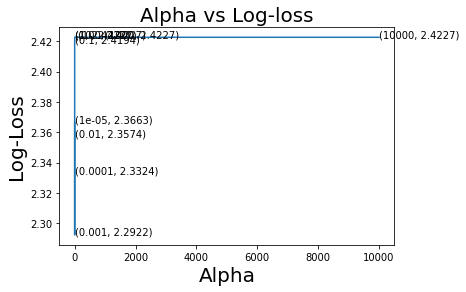

In [ ]:
warnings.simplefilter('ignore')

alpha = [10**x for x in range(-5,5)]
cv_log_loss = []

for i in alpha:
  clf = SGDClassifier(loss='log',alpha=i,class_weight='balanced')
  clf.fit(xtrain,ytrain)
  calib_clf = CalibratedClassifierCV(clf,method='sigmoid')
  calib_clf.fit(xtrain,ytrain)
  y_predicted = calib_clf.predict_proba(xcv)
  cv_log_loss.append(log_loss(ycv,y_predicted, labels=clf.classes_))
  print(f'For alpha value {str(i)} CV logloss is {str(log_loss(ycv,y_predicted,labels=clf.classes_))} ')

# plt.figure(figsize = (12, 7))
plt.plot(alpha, cv_log_loss)
for xy in zip(alpha, np.round(cv_log_loss, 4)):
    plt.annotate(xy, xy)
    
plt.title("Alpha vs Log-loss", fontsize = 20)
plt.xlabel("Alpha", fontsize = 20)
plt.ylabel("Log-Loss", fontsize = 20)
plt.show()

**Testing with best parameters**

In [ ]:
from sklearn.metrics import accuracy_score

best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(loss='log',alpha=best_alpha,penalty='l2',class_weight='balanced')
clf.fit(xtrain,ytrain)
calib_clf = CalibratedClassifierCV(clf,method='sigmoid')
calib_clf.fit(xtrain,ytrain)

predict_train = calib_clf.predict_proba(xtrain)
print(f'For best values of alpha {best_alpha} train log loss is {log_loss(ytrain,predict_train)}')

predict_cv = calib_clf.predict_proba(xcv)
print(f'For best values of alpha {best_alpha} cv log loss is {log_loss(ycv,predict_cv)}')


For best values of alpha 0.001 train log loss is 2.2162773173215835
For best values of alpha 0.001 cv log loss is 2.2916960895544065


In [ ]:
print("Percentage of mis-classified for Train points = "+str(np.round((np.count_nonzero(calib_clf.predict(xtrain) - ytrain)/xtrain.shape[0]*100), 2))+"%")
print("Percentage of mis-classified for CV points = "+str(np.round((np.count_nonzero(calib_clf.predict(xcv) - ycv)/xcv.shape[0]*100), 2))+"%")

Percentage of mis-classified for Train points = 76.42%
Percentage of mis-classified for CV points = 80.45%


-------------------- Confusion matrix --------------------


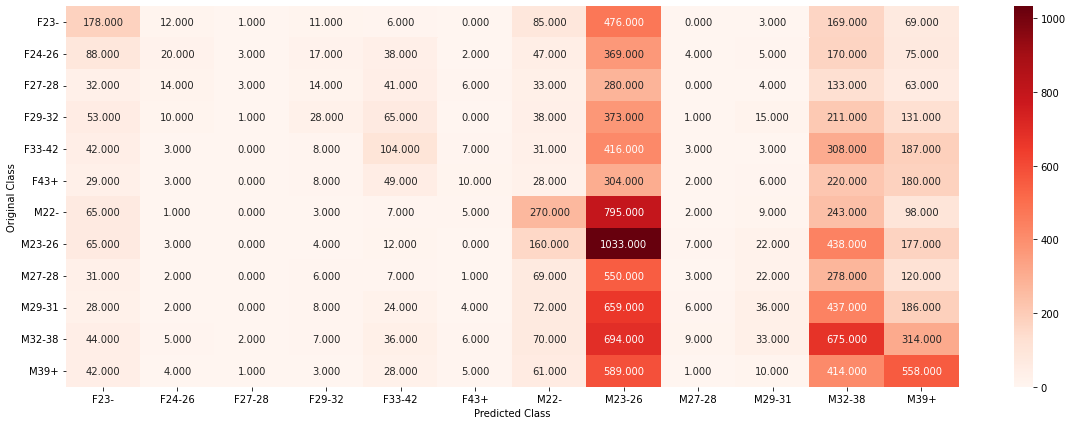

-------------------- Precision matrix (Columm Sum=1) --------------------


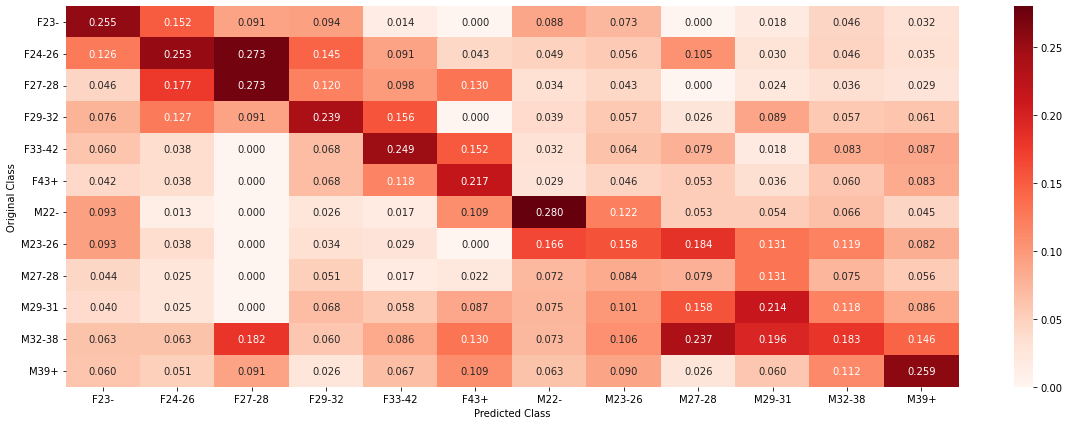

-------------------- Recall matrix (Row sum=1) --------------------


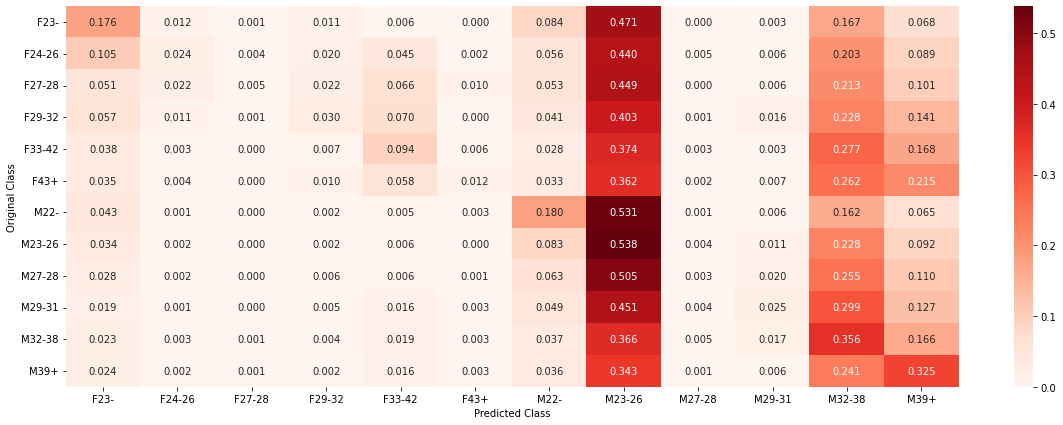

In [ ]:
table = table.append(pd.DataFrame([["Logistic regression", 2.208, 2.279, "76.2%", "80.34%"]], columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified Train", "Mis-Classified CV"]))

cvp = np.argmax(predict_cv,axis=1)
plotconfusionmatrix(ycv,cvp)

#**Support Vector Machines**

**Hyper parameter tunning for SVM**

For alpha value 1e-05 CV logloss is 2.378006835221794 
For alpha value 0.0001 CV logloss is 2.362331559136688 
For alpha value 0.001 CV logloss is 2.3444832291311495 
For alpha value 0.01 CV logloss is 2.3521784133657535 
For alpha value 0.1 CV logloss is 2.411638660106274 
For alpha value 1 CV logloss is 2.42345227033364 
For alpha value 10 CV logloss is 2.422943756673969 
For alpha value 100 CV logloss is 2.4226917326555624 
For alpha value 1000 CV logloss is 2.4226917329782736 
For alpha value 10000 CV logloss is 2.4226917323422352 


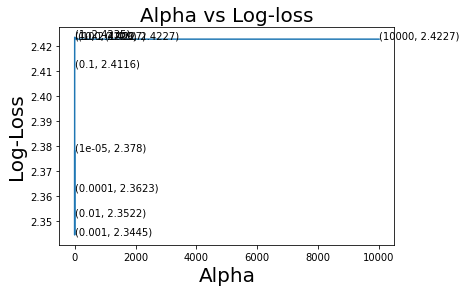

In [ ]:
warnings.simplefilter('ignore')

alpha = [10**x for x in range(-5,5)]
cv_log_loss = []

for i in alpha:
  clf = SGDClassifier(loss='hinge',alpha=i,class_weight='balanced')
  clf.fit(xtrain,ytrain)
  calib_clf = CalibratedClassifierCV(clf,method='sigmoid')
  calib_clf.fit(xtrain,ytrain)
  y_predicted = calib_clf.predict_proba(xcv)
  cv_log_loss.append(log_loss(ycv,y_predicted, labels=clf.classes_))
  print(f'For alpha value {str(i)} CV logloss is {str(log_loss(ycv,y_predicted,labels=clf.classes_))} ')

# plt.figure(figsize = (12, 7))
plt.plot(alpha, cv_log_loss)
for xy in zip(alpha, np.round(cv_log_loss, 4)):
    plt.annotate(xy, xy)
    
plt.title("Alpha vs Log-loss", fontsize = 20)
plt.xlabel("Alpha", fontsize = 20)
plt.ylabel("Log-Loss", fontsize = 20)
plt.show()

**Tunning with best parameters**

For best values of alpha 0.001 train log loss is 2.2807822523294004
For best values of alpha 0.001 cv log loss is 2.3455223891217187
Percentage of mis-classified for train points = 77.96%
Percentage of mis-classified for CV points = 82.17%
-------------------- Confusion matrix --------------------


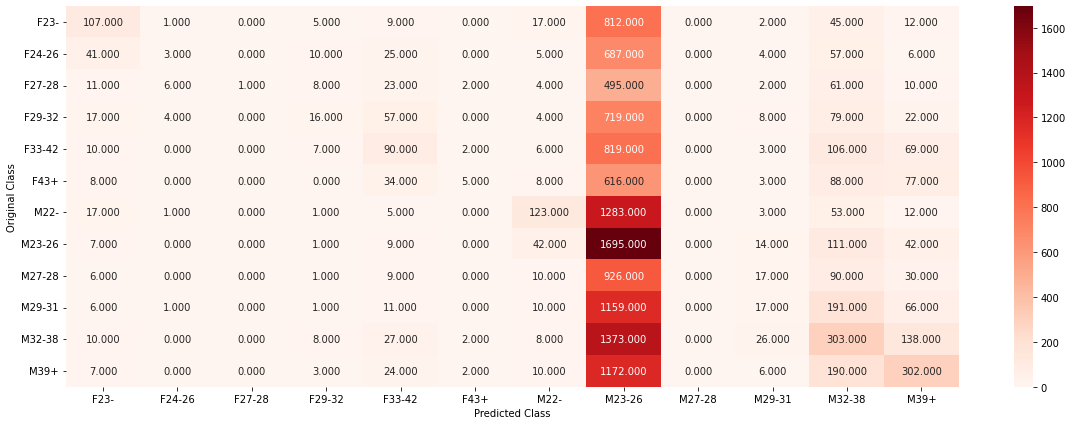

-------------------- Precision matrix (Columm Sum=1) --------------------


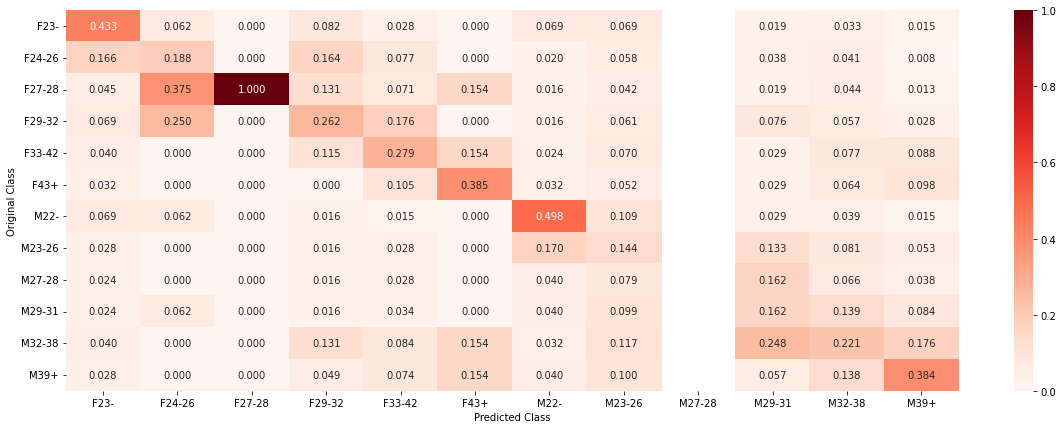

-------------------- Recall matrix (Row sum=1) --------------------


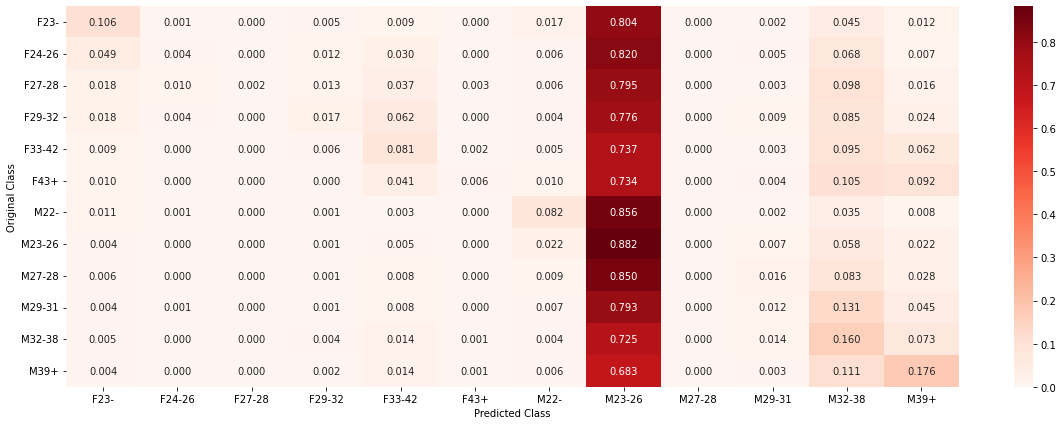

In [ ]:
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(loss='hinge',alpha=best_alpha,penalty='l2',class_weight='balanced')
clf.fit(xtrain,ytrain)
calib_clf = CalibratedClassifierCV(clf,method='sigmoid')
calib_clf.fit(xtrain,ytrain)


predict_train = calib_clf.predict_proba(xtrain)
print(f'For best values of alpha {best_alpha} train log loss is {log_loss(ytrain,predict_train)}')

predict_cv = calib_clf.predict_proba(xcv)
print(f'For best values of alpha {best_alpha} cv log loss is {log_loss(ycv,predict_cv)}')

svm_logLoss = log_loss(ycv, predict_cv)

print("Percentage of mis-classified for train points = "+str(np.round((np.count_nonzero(calib_clf.predict(xtrain) - ytrain)/xtrain.shape[0]*100), 2))+"%")
print("Percentage of mis-classified for CV points = "+str(np.round((np.count_nonzero(calib_clf.predict(xcv) - ycv)/xcv.shape[0]*100), 2))+"%")

cvp = np.argmax(predict_cv,axis=1)
plotconfusionmatrix(ycv,cvp)

In [ ]:
table = table.append(pd.DataFrame([["SVM", 2.253, 2.336, "76.67%", "82.2%"]], columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified Train", "Mis-Classified CV"]))


#**K Nearest Neighbour Classifier**

**Hyper parameter tunning for Knearest neighbours**

For neighbour value 3 CV logloss is 2.4132981304632053 
For neighbour value 13 CV logloss is 2.393189651970701 
For neighbour value 51 CV logloss is 2.3706165911783668 
For neighbour value 95 CV logloss is 2.3632664040922244 
For neighbour value 151 CV logloss is 2.3589607632888296 
For neighbour value 221 CV logloss is 2.3559898026463886 


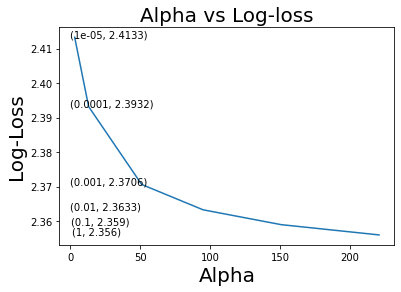

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

warnings.simplefilter('ignore')

neighbours=[3,  13 ,  51 , 95, 151, 221]
cv_log_loss = []

for i in neighbours:
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(xtrain,ytrain)
  calib_clf_knn = CalibratedClassifierCV(clf,method='sigmoid')
  calib_clf_knn.fit(xtrain,ytrain)
  y_predicted = calib_clf_knn.predict_proba(xcv)
  cv_log_loss.append(log_loss(ycv,y_predicted, labels=clf.classes_))
  print(f'For neighbour value {str(i)} CV logloss is {str(log_loss(ycv,y_predicted,labels=clf.classes_))} ')

# plt.figure(figsize = (12, 7))
plt.plot(neighbours, cv_log_loss)
for xy in zip(alpha, np.round(cv_log_loss, 4)):
    plt.annotate(xy, xy)
    
plt.title("Alpha vs Log-loss", fontsize = 20)
plt.xlabel("Alpha", fontsize = 20)
plt.ylabel("Log-Loss", fontsize = 20)
plt.show()

For best values of alpha 0.001 train log loss is 2.3314049810402895
For best values of alpha 0.001 cv log loss is 2.3559898026463886
Percentage of mis-classified for train points = 77.96%
Percentage of mis-classified for CV points = 82.17%
-------------------- Confusion matrix --------------------


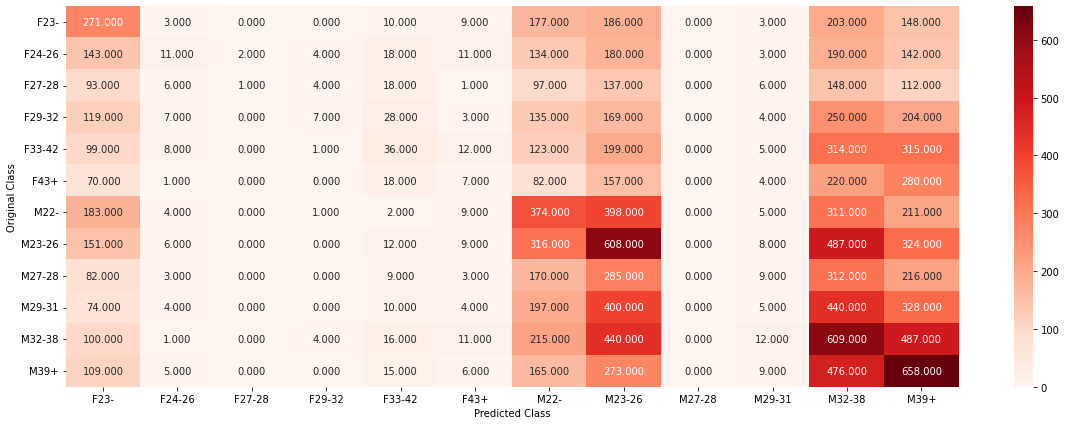

-------------------- Precision matrix (Columm Sum=1) --------------------


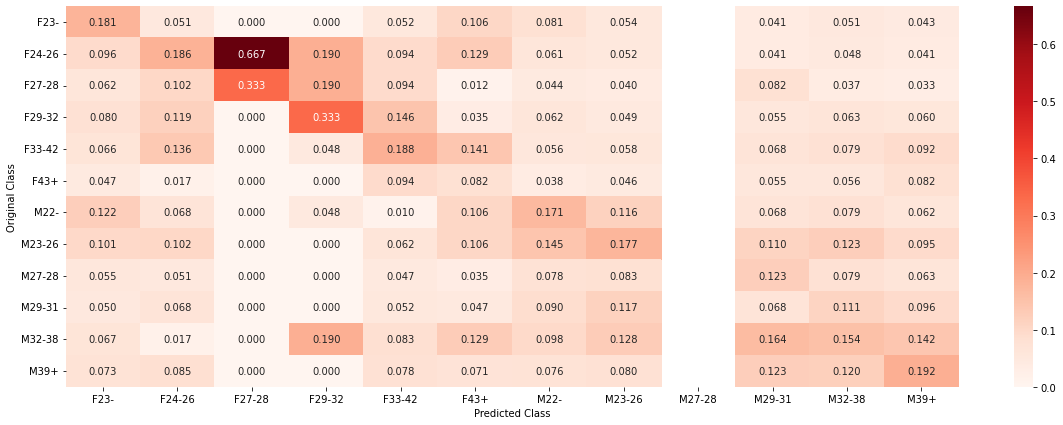

-------------------- Recall matrix (Row sum=1) --------------------


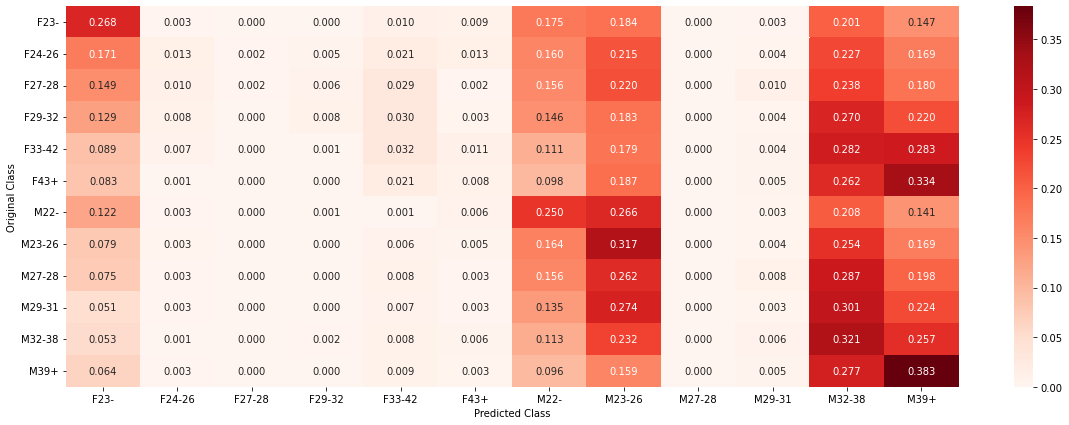

In [ ]:
best_n = neighbours[np.argmin(cv_log_loss)]
clf = KNeighborsClassifier(n_neighbors=best_n)
clf.fit(xtrain,ytrain)
calib_clf_knn = CalibratedClassifierCV(clf,method='sigmoid')
calib_clf_knn.fit(xtrain,ytrain)


predict_train = calib_clf_knn.predict_proba(xtrain)
print(f'For best values of alpha {best_alpha} train log loss is {log_loss(ytrain,predict_train)}')

predict_cv = calib_clf_knn.predict_proba(xcv)
print(f'For best values of alpha {best_alpha} cv log loss is {log_loss(ycv,predict_cv)}')

print("Percentage of mis-classified for train points = "+str(np.round((np.count_nonzero(calib_clf.predict(xtrain) - ytrain)/xtrain.shape[0]*100), 2))+"%")
print("Percentage of mis-classified for CV points = "+str(np.round((np.count_nonzero(calib_clf.predict(xcv) - ycv)/xcv.shape[0]*100), 2))+"%")

cvp = np.argmax(predict_cv,axis=1)
plotconfusionmatrix(ycv,cvp)

In [ ]:
table = table.append(pd.DataFrame([["Knn", 2.327, 2.352, "81.26%", "82.77%"]], columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified Train", "Mis-Classified CV"]))


#**Random Forest Classifier**

**Tuning with best parameters**

In [ ]:
#It was hard doing hyper parameter tunning for Random forest,since laptop goes in hang state,so we will use it without doing hyper parameter tunning.

clf = RandomForestClassifier(n_estimators = 100,n_jobs=-1)
clf.fit(xtrain, ytrain)
calib_clf = CalibratedClassifierCV(clf, method = "sigmoid")
calib_clf.fit(xtrain, ytrain)

predict_train = calib_clf.predict_proba(xtrain)
print(f"For best base learner {100} train log loss is {str(log_loss(ytrain,predict_train, labels=clf.classes_))}")


predict_cv = calib_clf.predict_proba(xcv)
print(f"For best base learner {100} cv log loss is {str(log_loss(ycv,predict_cv, labels=clf.classes_))}")


For best base learner 100 train log loss is 1.9398319178068708
For best base learner 100 cv log loss is 2.362841201644498


Percentage of mis-classified for train points = 54.98%
Percentage of mis-classified for CV points = 81.77%
-------------------- Confusion matrix --------------------


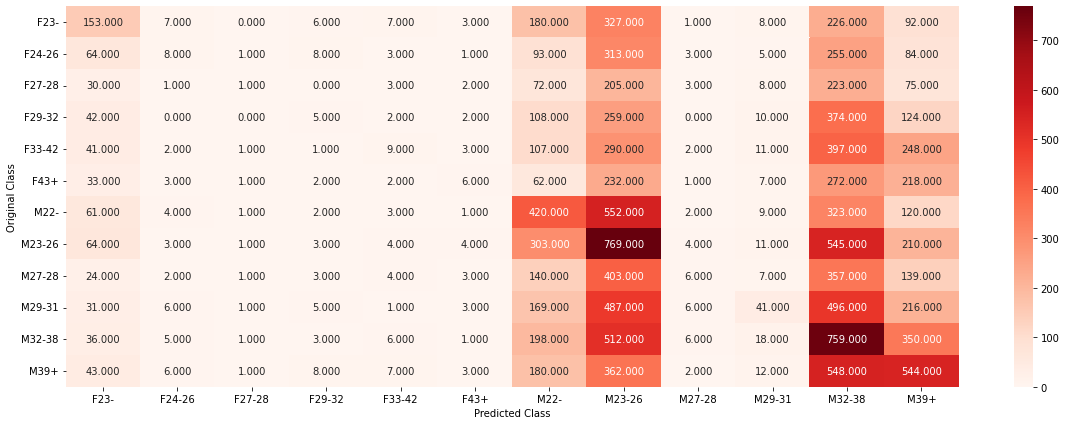

-------------------- Precision matrix (Columm Sum=1) --------------------


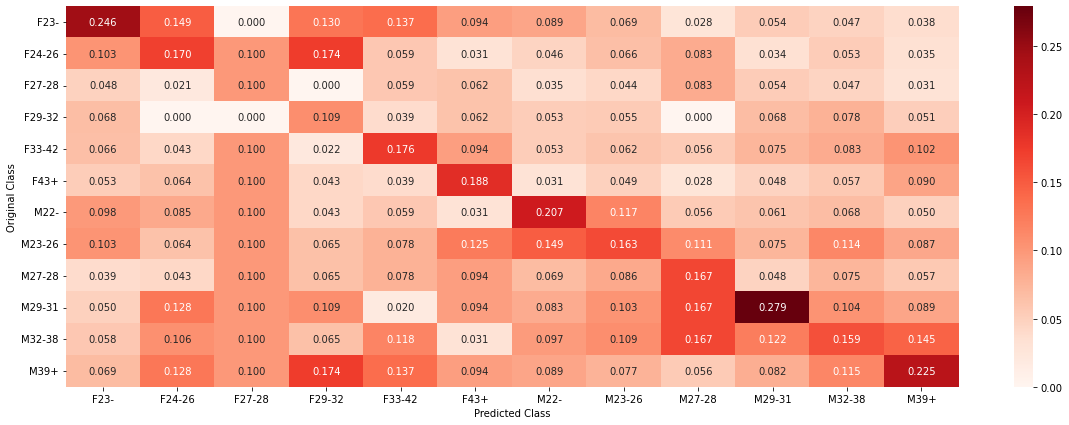

-------------------- Recall matrix (Row sum=1) --------------------


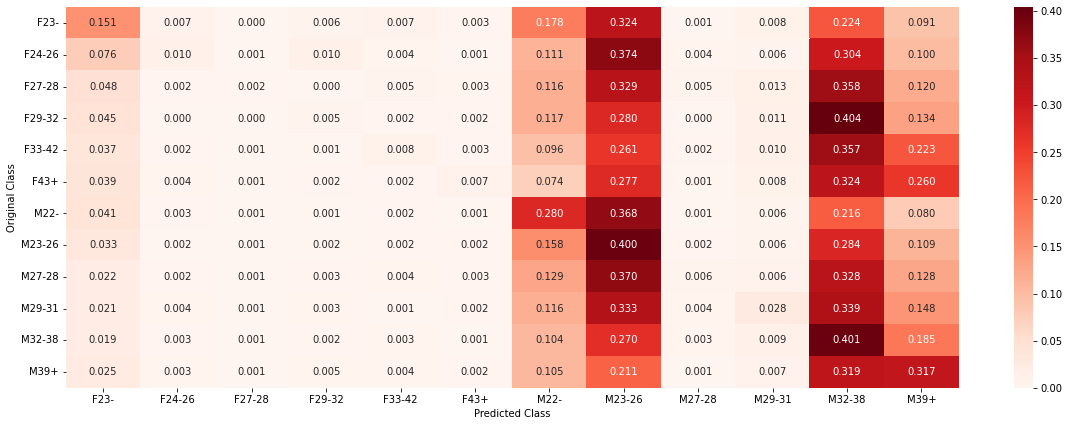

In [ ]:
randomforest_logLoss = log_loss(ycv, predict_cv)

print("Percentage of mis-classified for train points = "+str(np.round((np.count_nonzero(calib_clf.predict(xtrain) - ytrain)/xtrain.shape[0]*100), 2))+"%")
print("Percentage of mis-classified for CV points = "+str(np.round((np.count_nonzero(calib_clf.predict(xcv) - ycv)/xcv.shape[0]*100), 2))+"%")

cvp = np.argmax(predict_cv,axis=1)
plotconfusionmatrix(ycv,cvp)

In [ ]:
table = table.append(pd.DataFrame([["Random forest", 1.865, 2.357, "54.96%", "81.26%"]], columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified Train", "Mis-Classified CV"]))


<font size='5'> **Decision Tree** </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

In [ ]:
params = {
    'max_depth': [2, 3, 5,],
    'min_samples_leaf': [5, 10, 20,30],
    'min_samples_split':[5,10,20,30],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "neg_log_loss")

In [ ]:
grid_search.fit(xtrain, ytrain)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  3.1min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [5, 10, 20, 30], 'min_samples_split': [5, 10, 20, 30], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head(3)

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.690811      0.048597  ...         -2.408317         0.000617
1       0.621296      0.013764  ...         -2.408317         0.000617
2       0.626850      0.017132  ...         -2.408317         0.000617

[3 rows x 22 columns]

In [ ]:
# score_df.nlargest(5,"mean_test_score")
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
clf_dt = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
clf_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
calib_dt = CalibratedClassifierCV(clf_dt, method = "sigmoid")
calib_dt.fit(xtrain, ytrain)

predict_train = calib_dt.predict_proba(xtrain)
print(f"For best base learner {100} train log loss is {str(log_loss(ytrain,predict_train))}")


predict_cv = calib_dt.predict_proba(xcv)
print(f"For best base learner {100} cv log loss is {str(log_loss(ycv,predict_cv))}")


For best base learner 100 train log loss is 2.392975911657652
For best base learner 100 cv log loss is 2.3967833939313024


Percentage of mis-classified for train points = 84.66%
Percentage of mis-classified for CV points = 85.01%
-------------------- Confusion matrix --------------------


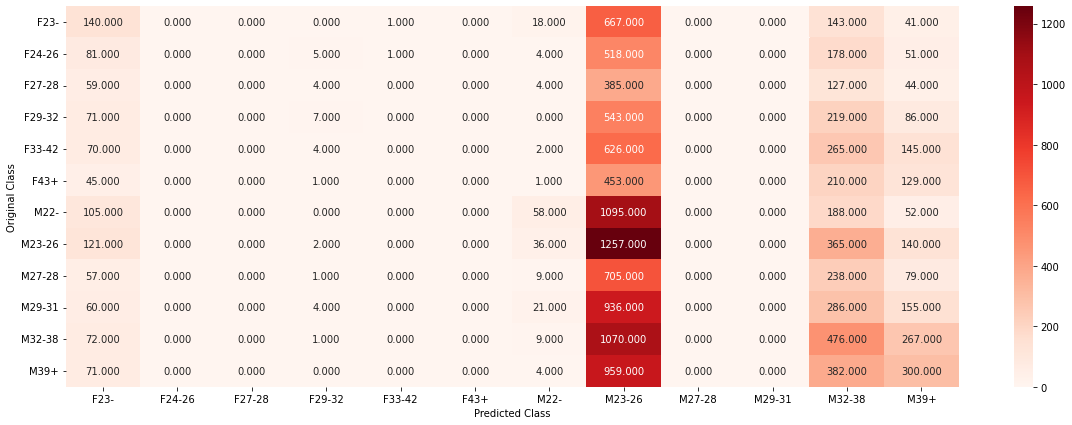

-------------------- Precision matrix (Columm Sum=1) --------------------


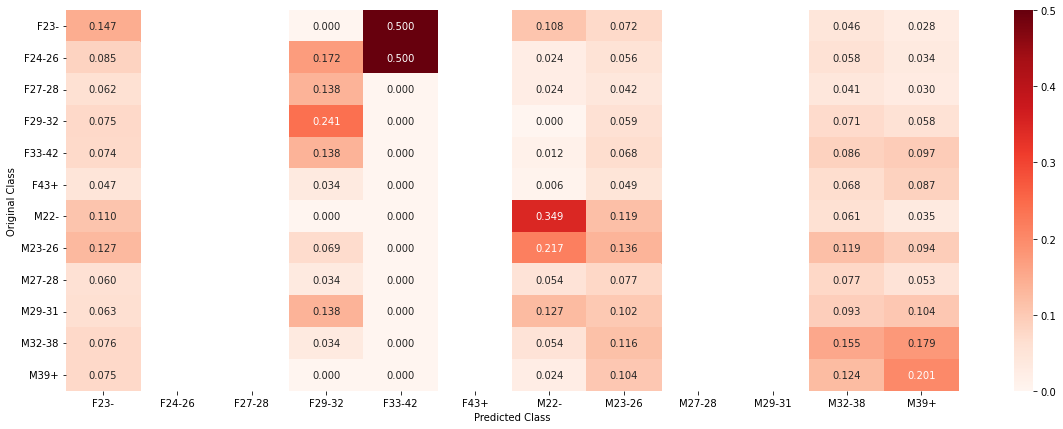

-------------------- Recall matrix (Row sum=1) --------------------


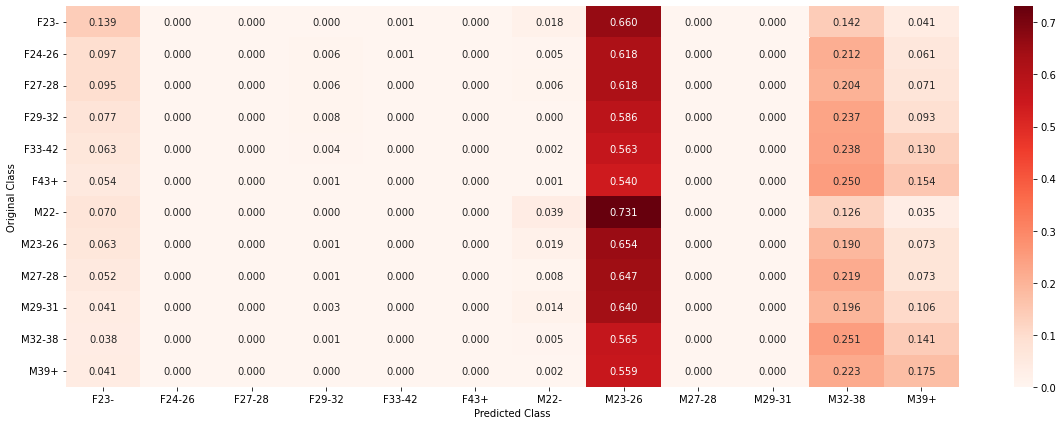

In [ ]:
print("Percentage of mis-classified for train points = "+str(np.round((np.count_nonzero(calib_dt.predict(xtrain) - ytrain)/xtrain.shape[0]*100), 2))+"%")
print("Percentage of mis-classified for CV points = "+str(np.round((np.count_nonzero(calib_dt.predict(xcv) - ycv)/xcv.shape[0]*100), 2))+"%")

cvp = np.argmax(predict_cv,axis=1)
plotconfusionmatrix(ycv,cvp)

In [ ]:
table = table.append(pd.DataFrame([["Decision tree", 2.392, 2.396, "84.66%", "85.01%"]], columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified Train", "Mis-Classified CV"]))


<font size='5'> **Gradient Boosting Decision Tree** </font>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf_gdc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [ ]:
clf_gdc.fit(xtrain, ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
calib_gdc = CalibratedClassifierCV(clf_gdc, method = "sigmoid")
calib_gdc.fit(xtrain, ytrain)

predict_train = calib_gdc.predict_proba(xtrain)
print(f"For gradient boosting classifier train log loss is {str(log_loss(ytrain,predict_train))}")


predict_cv = calib_gdc.predict_proba(xcv)
print(f"For gradient boosting classifier cv log loss is {str(log_loss(ycv,predict_cv))}")


For gradient boosting classifier train log loss is 2.3761121584734712
For gradient boosting classifier cv log loss is 2.389798880105797


Percentage of mis-classified for train points = 81.48%
Percentage of mis-classified for CV points = 83.51%
-------------------- Confusion matrix --------------------


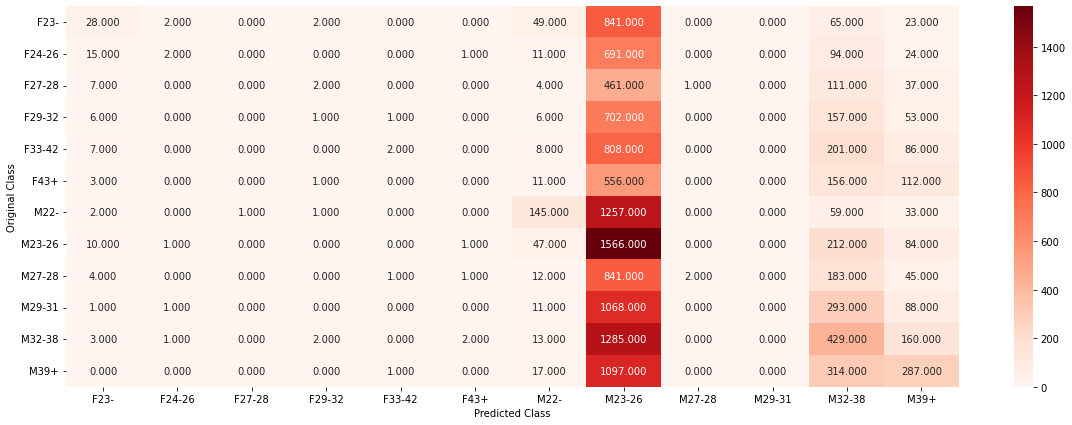

-------------------- Precision matrix (Columm Sum=1) --------------------


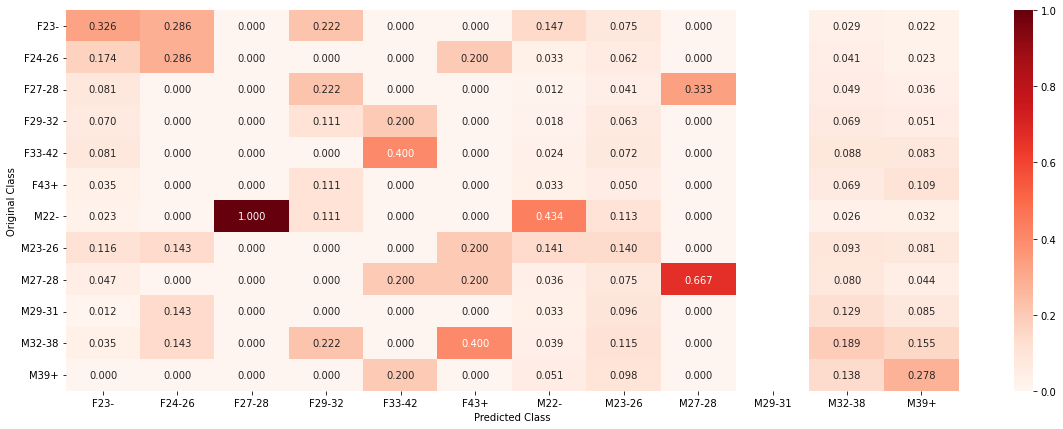

-------------------- Recall matrix (Row sum=1) --------------------


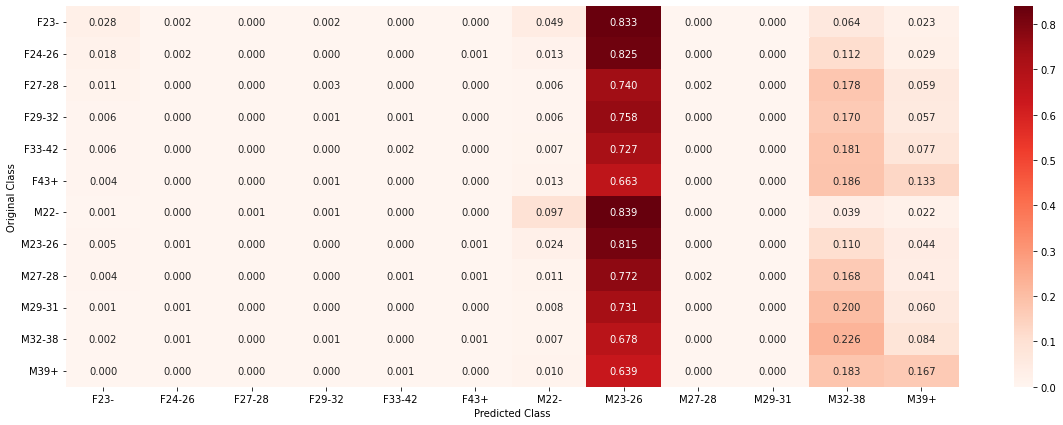

In [ ]:
print("Percentage of mis-classified for train points = "+str(np.round((np.count_nonzero(calib_gdc.predict(xtrain) - ytrain)/xtrain.shape[0]*100), 2))+"%")
print("Percentage of mis-classified for CV points = "+str(np.round((np.count_nonzero(calib_gdc.predict(xcv) - ycv)/xcv.shape[0]*100), 2))+"%")

cvp = np.argmax(predict_cv,axis=1)
plotconfusionmatrix(ycv,cvp)

In [ ]:
table = table.append(pd.DataFrame([["Gradient boosting decision tree", 2.376, 2.389, "81.48%", "83.51%"]], columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified Train", "Mis-Classified CV"]))


<font size='5'> **Light Gradient Boosting Machine**</font>

In [ ]:
import lightgbm

In [ ]:
traindata = lightgbm.Dataset(xtrain,ytrain)
cvdata = lightgbm.Dataset(xcv,ycv)

In [ ]:
parameters = {
    'objective': 'multiclass', 
    'num_class':12, 
    'metric': 'multi_logloss'
}

In [ ]:
model_lgbm = lightgbm.train(parameters,traindata,valid_sets=cvdata,num_boost_round=500,early_stopping_rounds=60)

[1]	valid_0's multi_logloss: 2.41767
Training until validation scores don't improve for 60 rounds.
[2]	valid_0's multi_logloss: 2.40942
[3]	valid_0's multi_logloss: 2.40185
[4]	valid_0's multi_logloss: 2.39517
[5]	valid_0's multi_logloss: 2.38904
[6]	valid_0's multi_logloss: 2.3835
[7]	valid_0's multi_logloss: 2.3786
[8]	valid_0's multi_logloss: 2.37393
[9]	valid_0's multi_logloss: 2.36955
[10]	valid_0's multi_logloss: 2.36565
[11]	valid_0's multi_logloss: 2.36217
[12]	valid_0's multi_logloss: 2.35853
[13]	valid_0's multi_logloss: 2.35518
[14]	valid_0's multi_logloss: 2.35237
[15]	valid_0's multi_logloss: 2.34945
[16]	valid_0's multi_logloss: 2.34702
[17]	valid_0's multi_logloss: 2.34464
[18]	valid_0's multi_logloss: 2.34231
[19]	valid_0's multi_logloss: 2.34008
[20]	valid_0's multi_logloss: 2.33792
[21]	valid_0's multi_logloss: 2.33594
[22]	valid_0's multi_logloss: 2.33402
[23]	valid_0's multi_logloss: 2.33197
[24]	valid_0's multi_logloss: 2.33023
[25]	valid_0's multi_logloss: 2.32859

In [ ]:
ypred = model_lgbm.predict(xtrain)
cvpred = model_lgbm.predict(xcv)
# model_lgbm.fit(xtrain,ytrain)

For Light Gradient Boosting Machine  train log loss is 2.004433784969714
For bLight Gradient Boosting Machine cv log loss is 2.282175621768919
-------------------- Confusion matrix --------------------


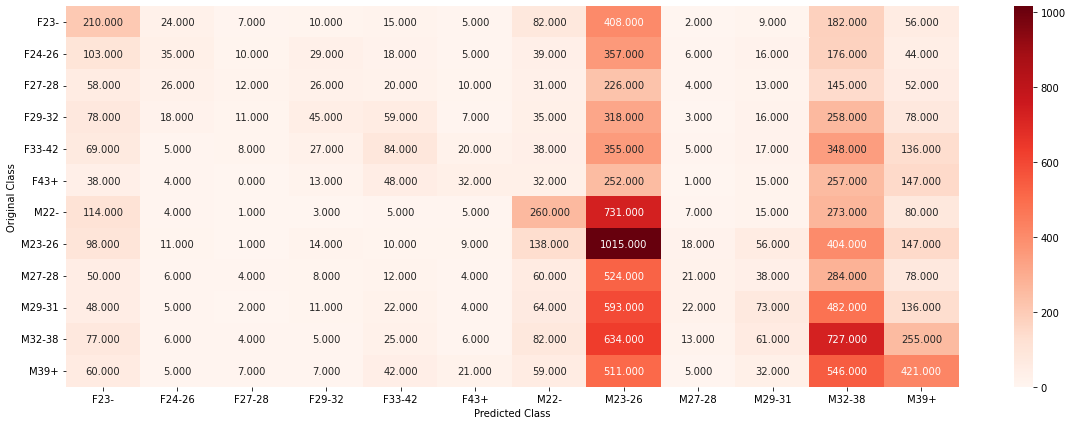

-------------------- Precision matrix (Columm Sum=1) --------------------


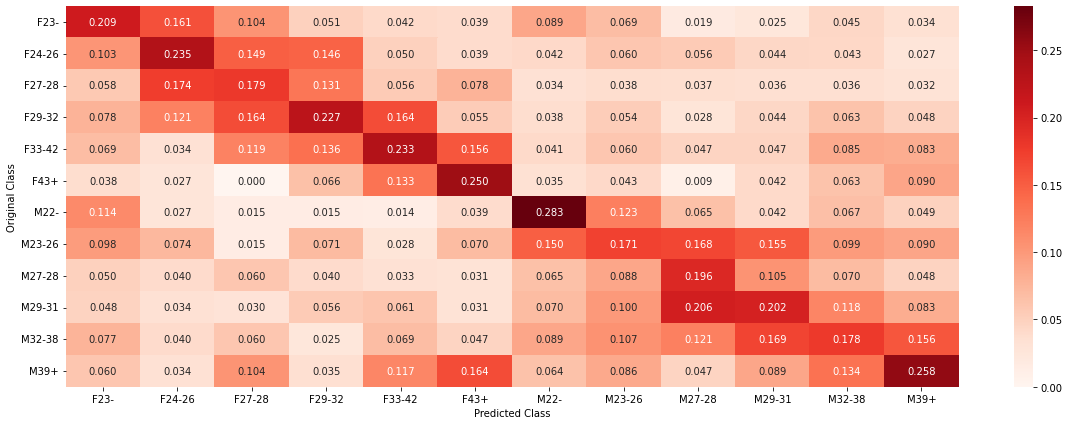

-------------------- Recall matrix (Row sum=1) --------------------


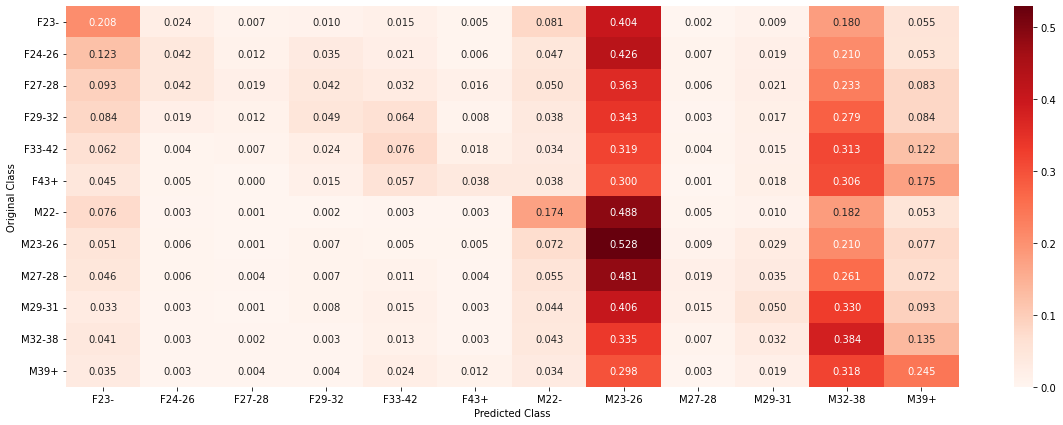

In [ ]:
print(f"For Light Gradient Boosting Machine  train log loss is {str(log_loss(ytrain,ypred))}")
print(f"For bLight Gradient Boosting Machine cv log loss is {str(log_loss(ycv,cvpred))}")

cvp = np.argmax(cvpred,axis=1)
plotconfusionmatrix(ycv,cvp)

In [ ]:
table = table.append(pd.DataFrame([["lgbm", 2.004, 2.282, "NA", "NA"]], columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified Train", "Mis-Classified CV"]))


#**Stacking Model**

stacking models with logistic regression, Support vector machines and GBDT

In [ ]:
clf_LR = SGDClassifier(loss = "log", alpha = 0.001, class_weight = "balanced")
clf_LR.fit(xtrain, ytrain)
calib_clf_LR = CalibratedClassifierCV(clf_LR, method = "sigmoid")
calib_clf_LR.fit(xtrain, ytrain)
print("Logistic Regression CV Log Loss: "+str(np.round(log_loss(ycv, calib_clf_LR.predict_proba(xcv), labels=clf_LR.classes_), 4)))

clf_SVM = SGDClassifier(loss = "hinge", alpha = 0.001, class_weight = "balanced")
clf_SVM.fit(xtrain, ytrain)
calib_clf_SVM = CalibratedClassifierCV(clf_SVM, method = "sigmoid")
calib_clf_SVM.fit(xtrain, ytrain)
print("SVM CV Log Loss: "+str(np.round(log_loss(ycv, calib_clf_SVM.predict_proba(xcv), labels=clf_SVM.classes_), 4)))


clf_gdc = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0, max_depth=1)
clf_gdc.fit(xtrain, ytrain)
calib_gdc = CalibratedClassifierCV(clf_gdc, method = "sigmoid")
calib_gdc.fit(xtrain, ytrain)
print("Gradient boosting classifier CV Log Loss: "+str(np.round(log_loss(ycv, calib_gdc.predict_proba(xcv), labels=clf_SVM.classes_), 4)))


Logistic Regression CV Log Loss: 2.2921
SVM CV Log Loss: 2.3438
Gradient boosting classifier CV Log Loss: 2.3962


In [ ]:
from mlxtend.classifier import StackingClassifier

cv_log_loss = []
alpha = [10**x for x in range(-3, 0)]
for i in alpha:
    lr = SGDClassifier(loss = "log", alpha = i)
    stack_clf = StackingClassifier(classifiers=[calib_clf_LR, calib_clf_SVM, calib_gdc], meta_classifier=lr)
    stack_clf.fit(xtrain, ytrain)
    cv_log_loss.append(log_loss(ycv, stack_clf.predict_proba(xcv)))
    print("Stacking Classifer : For alpha value: "+str(i)+" Log Loss: "+str(np.round(log_loss(ycv, stack_clf.predict_proba(xcv)), 4)))

Stacking Classifer : For alpha value: 0.001 Log Loss: 2.4918
Stacking Classifer : For alpha value: 0.01 Log Loss: 2.3834
Stacking Classifer : For alpha value: 0.1 Log Loss: 2.3959


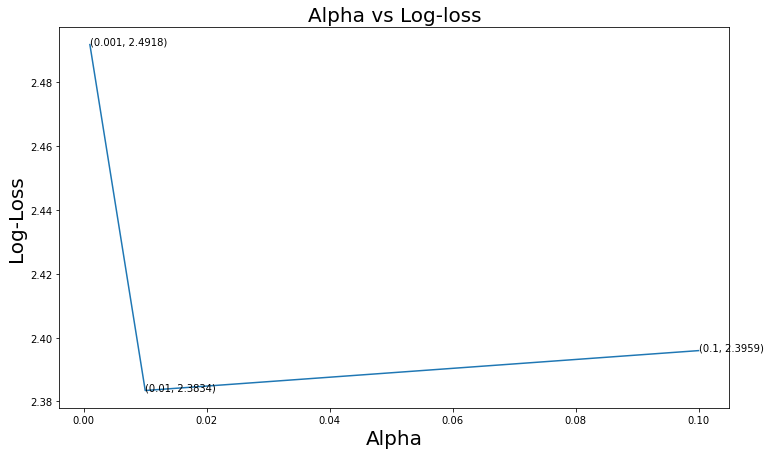

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(alpha, cv_log_loss)
for xy in zip(alpha, np.round(cv_log_loss, 4)):
    plt.annotate(xy, xy)
    
plt.title("Alpha vs Log-loss", fontsize = 20)
plt.xlabel("Alpha", fontsize = 20)
plt.ylabel("Log-Loss", fontsize = 20)
plt.show()

In [ ]:
best_alpha = alpha[np.argmin(cv_log_loss)]
lr = SGDClassifier(loss = "log", alpha = best_alpha)
stack_clf = StackingClassifier(classifiers=[ calib_clf_LR, calib_clf_SVM, calib_gdc], meta_classifier=lr, use_probas=True)
stack_clf.fit(xtrain, ytrain)


StackingClassifier(average_probas=False,
          classifiers=[CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change..._fraction=0.1,
              verbose=0, warm_start=False),
            cv='warn', method='sigmoid')],
          meta_classifier=SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=True, 

In [ ]:

predict_train = stack_clf.predict_proba(xtrain)
print(f"train log loss for Stacking model is {str(log_loss(ytrain,predict_train))}")

predict_cv = stack_clf.predict_proba(xcv)
print(f"cv log loss for Stacking model is  {str(log_loss(ycv,predict_cv))}")

train log loss for Stacking model is 2.402894146466137
cv log loss for Stacking model is  2.407362152682834


Percentage of mis-classified for train points = 82.25%
Percentage of mis-classified for CV points = 83.53%
-------------------- Confusion matrix --------------------


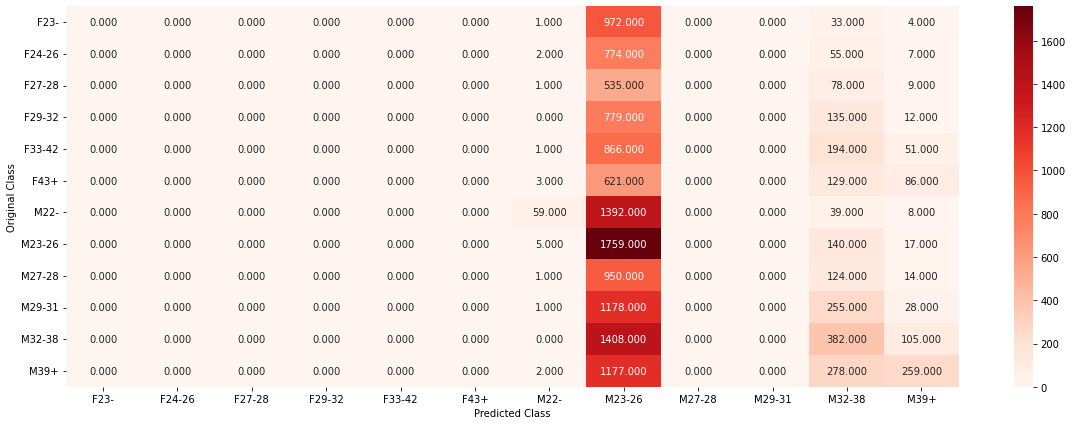

-------------------- Precision matrix (Columm Sum=1) --------------------


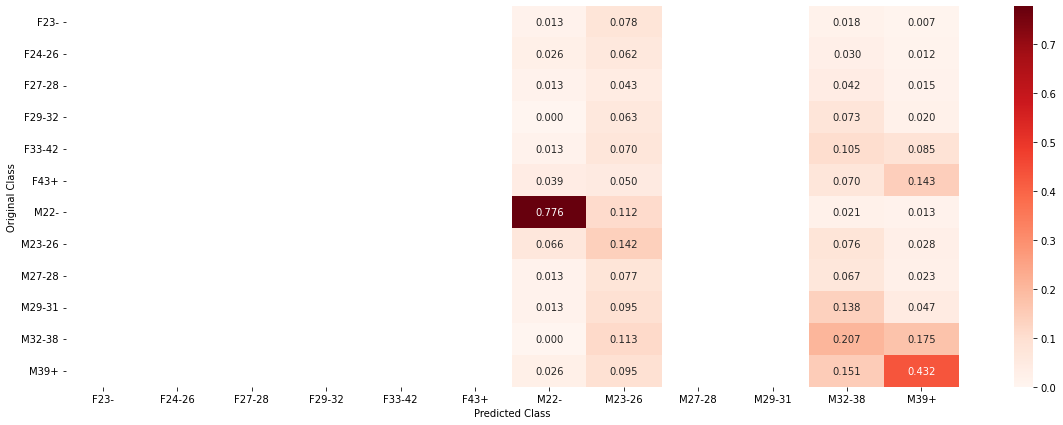

-------------------- Recall matrix (Row sum=1) --------------------


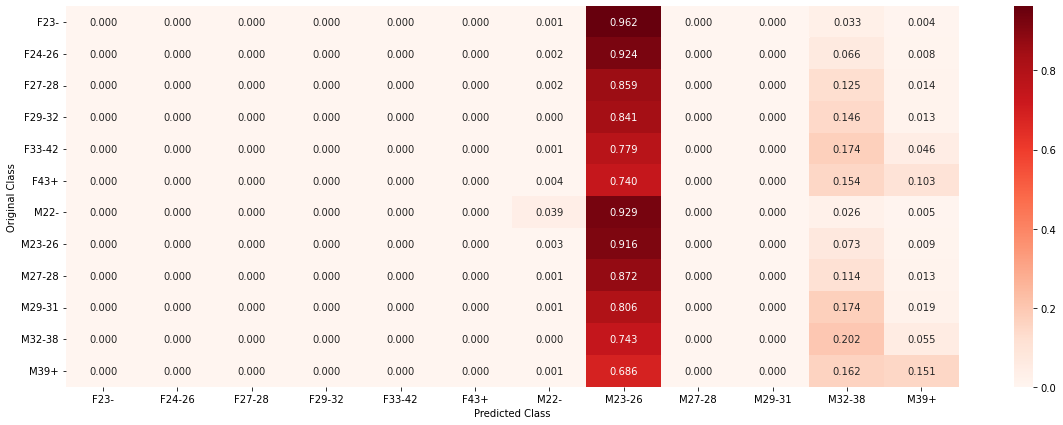

In [ ]:
print("Percentage of mis-classified for train points = "+str(np.round((np.count_nonzero(stack_clf.predict(xtrain) - ytrain)/xtrain.shape[0]*100), 2))+"%")
print("Percentage of mis-classified for CV points = "+str(np.round((np.count_nonzero(stack_clf.predict(xcv) - ycv)/xcv.shape[0]*100), 2))+"%")

cvp = np.argmax(predict_cv,axis=1)
plotconfusionmatrix(ycv,cvp)

In [ ]:
table = table.append(pd.DataFrame([["Stacking ", 2.402, 2.407, "82.25%", "83.53%"]], columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified Train", "Mis-Classified CV"]))


#**Voting classifier**

**Maximum voting classifier using logistics regression, svm and gbdt**

In [ ]:
from sklearn.ensemble import VotingClassifier

vclf = VotingClassifier(estimators=[('lr', calib_clf_LR), ('svc', calib_clf_SVM), ('GBDT', calib_gdc)], voting='soft', n_jobs = -1)
vclf.fit(xtrain, ytrain)
print("Log loss (train) on the VotingClassifier :"+str(np.round(log_loss(ytrain, vclf.predict_proba(xtrain), labels=vclf.classes_), 2)))
print("Log loss (CV) on the VotingClassifier :"+str(np.round(log_loss(ycv, vclf.predict_proba(xcv), labels=vclf.classes_), 2)))

print("Percentage of mis-classified for Test points :"+str(np.round((np.count_nonzero(vclf.predict(xtrain) - ytrain)/xtrain.shape[0]*100), 2))+"%")
print("Percentage of mis-classified for cv points :"+str(np.round((np.count_nonzero(vclf.predict(xcv) - ycv)/xcv.shape[0]*100), 2))+"%")



Log loss (train) on the VotingClassifier :2.28
Log loss (CV) on the VotingClassifier :2.33
Percentage of mis-classified for Test points :77.56%
Percentage of mis-classified for cv points :81.27%


-------------------- Confusion matrix --------------------


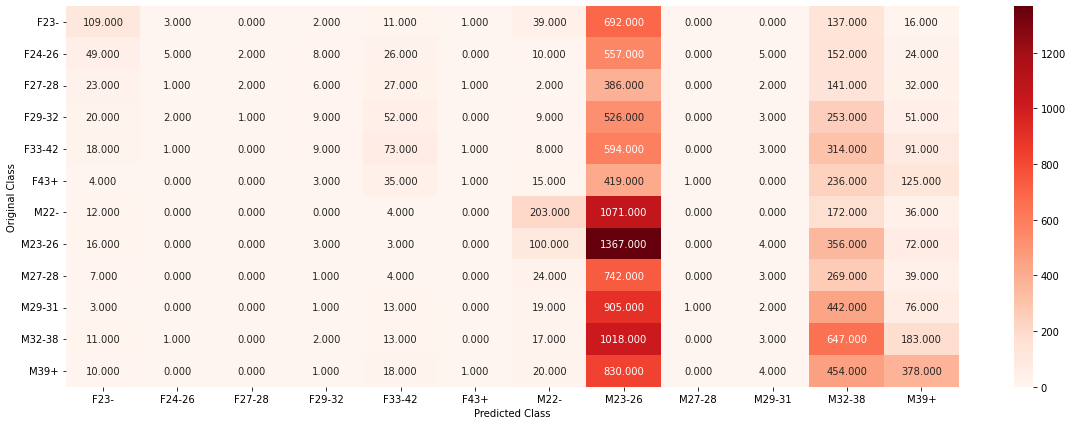

-------------------- Precision matrix (Columm Sum=1) --------------------


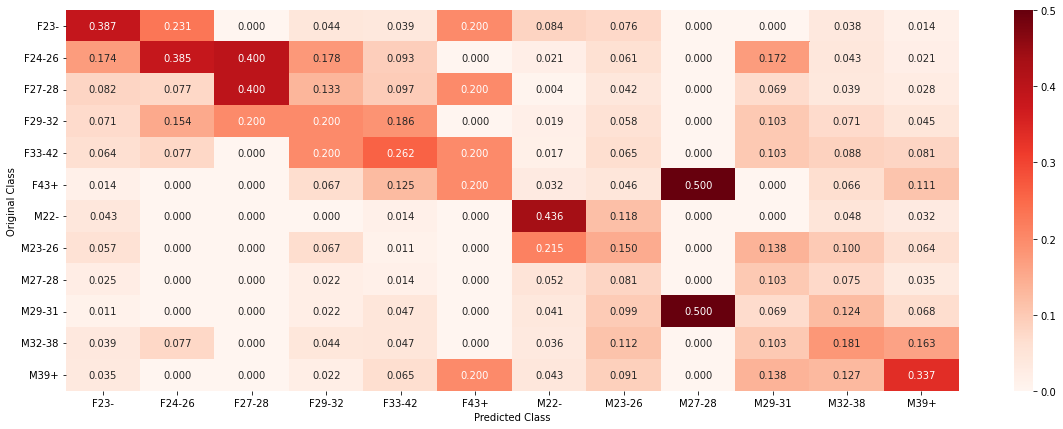

-------------------- Recall matrix (Row sum=1) --------------------


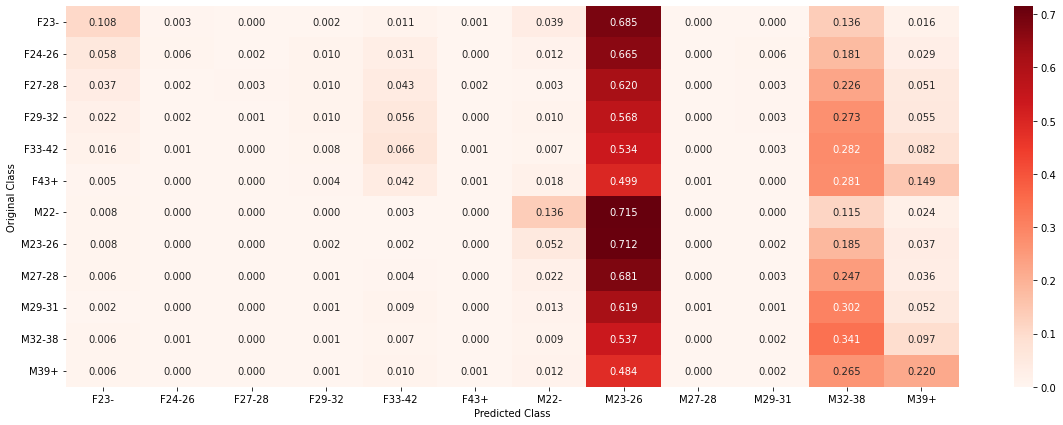

In [ ]:
predict_train = vclf.predict_proba(xtrain)
predict_cv = vclf.predict_proba(xcv)

cvp = np.argmax(predict_cv,axis=1)
plotconfusionmatrix(ycv,cvp)

In [ ]:
table = table.append(pd.DataFrame([["Voting ", 2.28, 2.33, "77.56", "81.27%"]], columns = ["Model", "Train Log-loss", "CV Log-loss", "Mis-Classified Train", "Mis-Classified CV"]))

**Results**


In [5]:
table

Model  ...  Mis-Classified CV
0              Logistic regression  ...             80.34%
0                              SVM  ...              82.2%
0                              Knn  ...             82.77%
0                    Random forest  ...             81.26%
0                    Decision tree  ...             85.01%
0  Gradient boosting decision tree  ...             83.51%
0                             lgbm  ...                 na
0                        Stacking   ...             83.53%
0                          Voting   ...             81.27%

[9 rows x 5 columns]

In [6]:
tab2 = table.drop(["Mis-Classified CV", "Mis-Classified Train"], axis = 1)

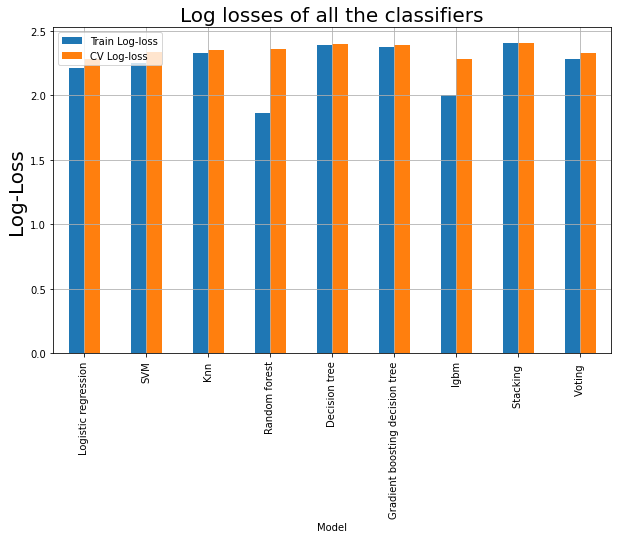

In [9]:
tab2.plot(x = "Model", kind = "bar", figsize = (10, 6), grid = True, fontsize = 10)
plt.title("Log losses of all the classifiers", fontsize = 20)
plt.ylabel("Log-Loss", fontsize = 20)
plt.show()

**Logistic regression is best model with log loss of 2.279**

**Conclusion**

1.Best Model we have is Logistic regression with log loss of 2.279, which is less than log loss of stacking model(3 models stacked) and voting classifier model.

2.There is large amount of missing data related to Event details,which is almost 70% of entire data.

3.Excluding that for non events data we only have phone brand and device model which is not enough to train efficient model.